First of all, we import all the packages required for running the notebook

Linking to the google drive. Change this to your own drive/folder directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/SBI
!ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/SBI
12_BNN_pos_gauss1.pdf
12_BNN_pos_gauss2.pdf
12_BNN_pos_gauss3.pdf
12_BNN_pos.pdf
12param_BNN_1mil.pkl
12param_BNN_500k.pkl
12param_BNN_800k2.pkl
12param_BNN_800k3.pkl
12param_BNN_800k_42.pkl
12param_BNN_800k_465_gauss1.pkl
12param_BNN_800k_465_gaussian2.pkl
12param_BNN_800k_465_gaussian_3.pkl
12param_BNN_800k_465_gaussian.pkl
12param_BNN_800k_839.pkl
12param_BNN_800k.pkl
12param_BNN_800_test.pkl
12param_BNN_gauss1.pkl
12param_BNN_gauss2.pkl
12param_BNN_gauss3.pkl
12param_BNN.pkl
12param_corner_465.pdf
12_parameter_corner_465.pdf
12param_model_1.pkl
12param_model_400_20_42.pkl
12param_model_400k_100hf_20nt_Jason.pkl
12param_model_42_0.pkl
12param_model_42_1.pkl
12param_model_42_1_redo.pkl
12param_model_42_2.pkl
12param_model_42_2_redo.pkl
12param_model_42_3.pkl
12param_model_42_3_redo.pkl
12param_model_42_4_redo.pkl
12param_model_500k_1000hf_10nt_Jason.pkl
12param_model_500k_1000hf_30nt_2_Jason.pkl
12param_model_500k_1

Install libraries for SBI, deeplenstronomy and getdist (plotting library)

In [ ]:
# ! apt-get update --quiet
# ! sudo apt-get install texlive-latex-recommended  --quiet
# ! sudo apt install texlive-latex-extra --quiet
# ! sudo apt install dvipng --quiet
# ! apt install cm-super --quiet
# !pip install chainconsumer --quiet

!pip install sbi --quiet
!pip install lenstronomy --quiet
!pip install deeplenstronomy --quiet
!pip install getdist --quiet
!pip install -q gwpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.3/272.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.3/826.3 kB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadat

In [ ]:
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng --quiet

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius
  fonts-adf-universalis fonts-cabin fonts-cantarell fonts-comfortaa fonts-croscore
  fonts-crosextra-caladea fonts-crosextra-carlito fonts-dejavu-core fonts-dejavu-extra
  fonts-droid-fallback fonts-ebgaramond fonts-ebgaramond-extra fonts-font-awesome
  fonts-freefont-otf fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-complutum fonts-gfs-didot
  fonts-gfs-neohellenic fonts-gfs-olga fonts-gfs-solomos fonts-go fonts-junicode fonts-lato
  fonts-linuxlibertine fonts-lmodern fonts-lobster fonts-lobstertwo fonts-noto-color-emoji
  fonts-noto-core fonts-noto-mono fonts-oflb-asana-math fonts-open-sans fonts-roboto-unhinted
  fonts-sil-charis fonts-sil-gentium fonts-sil-gentium-basic fonts-sil-gentiumplus
  fonts-sil-gentiumplus-compact fonts-stix fonts-texgyre fonts-urw-base35 

There seems to be some bug with matplotlib and the other packages. This is a temporary workaround.

This imports everything we need to run things (Some may be redundant)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sbi import utils, inference
# from sbi import inference
from sbi.inference import SNPE, simulate_for_sbi, prepare_for_sbi
import numpy as np
import scipy as sp
from scipy import stats
import getdist
from getdist import plots, MCSamples
from getdist.styles.tab10 import style_name
plots.set_active_style(style_name)

# import main simulation class of lenstronomy
from lenstronomy.Util import util
from lenstronomy.LightModel.light_model import LightModel
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.Data.imaging_data import ImageData
from lenstronomy.ImSim.image_model import ImageModel
import lenstronomy.Util.image_util as image_util
from lenstronomy.Data.psf import PSF

# set seed for numpy and torch
import deeplenstronomy.deeplenstronomy as dl
from deeplenstronomy.visualize import view_image

# Import basic packages
import numpy as np
import scipy as sp
import pandas as pd
import pylab as plt
import scipy.stats
from matplotlib.patches import Ellipse
import pickle
#from chainconsumer import ChainConsumer

# Colab in order to download files
from google.colab import files


# Scikit-learn for scaling and preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Tensorflow and Keras
import tensorflow as tf
import tensorflow_probability as tfp

#import deeplenstronomy.deeplenstronomy as dl
#from deeplenstronomy.visualize import view_image

from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
# Keras Layers
from keras.layers import InputLayer
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

# Import some layers etc that are useful in the Functional approach
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
import pandas
import copy


# Matplotlib, seaborn and plot pretty
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
from mpl_toolkits.axes_grid1 import make_axes_locatable

# from mpl_toolkits.axes_grid1 import make_axes_locatable
#
# # Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=12):
    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    plt.rc('text', usetex=False)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10)
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10)
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines
    return

plot_pretty()

# Pillow
from PIL import Image


#fix seed
np.random.seed(100)
#random.seed(100)

# Now we load all our SBI data and trained network



### Here we need to define the SBI network and then load the trained SBI model. Make sure the summary network structure is the exact same as when you trained it or you will get an error.



In [ ]:
class SummaryNet(nn.Module):

   def __init__(self):
       super().__init__()
       # 2D convolutional layer
       self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding='same')
       self.bn1 = nn.BatchNorm2d(8)
       self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding='same')
       self.bn2 = nn.BatchNorm2d(16)

       self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding='same')
       self.bn3 = nn.BatchNorm2d(32)
       self.conv4 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding='same')
       self.bn4 = nn.BatchNorm2d(32)

       self.conv5 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding='same')
       self.bn5 = nn.BatchNorm2d(64)
       self.conv6 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding='same')
       self.bn6 = nn.BatchNorm2d(128)

       # Maxpool layer that reduces 32x32 image to 4x4
       self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
       # Fully connected layer taking as input the 6 flattened output arrays from the maxpooling layer
       self.fc = nn.Linear(in_features=128*4*4, out_features=20)

   def forward(self, x):
       x = x.view(-1, 1, 32, 32)

       x = (self.bn1(F.relu(self.conv1(x))))
       x = self.pool(self.bn2(F.relu(self.conv2(x))))

       x = self.bn3(F.relu(self.conv3(x)))
       x = self.pool(self.bn4(F.relu(self.conv4(x))))

       x = self.bn5(F.relu(self.conv5(x)))
       x = self.pool(self.bn6(F.relu(self.conv6(x))))

       x = x.view(-1, 128*4*4)
       x = F.relu(self.fc(x))
       return x

embedding_net = SummaryNet().to('cuda:0')


from torchsummary import summary
summary(embedding_net, (1, 32, 32))

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

Now we load our SBI model. It's saved a pickle file so we load it as one

In [ ]:
import pickle

# file_name = "../SBI_WG/Ashwin_models/400k_5param_Ashwin_May16_seed465.pkl"
# file_name_1 = "../SBI_WG/Ashwin_models/100k_5param_Ashwin_May3_seed42.pkl"

file_name = "../SBI_WG/Ashwin_models/5param/400k_5param_Ashwin_Aug29_seed465.pkl"
# file_name = "../SBI_WG/Ashwin_models/5param/400k_5param_Ashwin_Sept9_seed839.pkl"
# file_name = "../SBI_WG/Ashwin_models/5param/400k_5param_Ashwin_Sept9_seed42.pkl"

open_file = open(file_name, "rb")
pos_list = pickle.load(open_file)
open_file.close()
# open_file = open(file_name_1, "rb")
# pos_list_1 = pickle.load(open_file)
# open_file.close()

seed = 465

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

Now we generate our test set. This test set has 1000 images. We will also generate a second set with the same parameters but Einstein ring set to zero to get the unlensed source image.


In [ ]:
config_file = '../SBI_WG/5param_model_test.yaml'
test_set = dl.make_dataset(config_file, return_planes=True)

config_file = '../SBI_WG/5param_model_test_source.yaml'
source_set = dl.make_dataset(config_file, return_planes=True)

In [ ]:
view_image(test_set.CONFIGURATION_1_images[0:5,0])
view_image(test_set.CONFIGURATION_1_images[10:15,0])
view_image(test_set.CONFIGURATION_1_images[20:25,0])
view_image(test_set.CONFIGURATION_1_images[30:35,0])
view_image(test_set.CONFIGURATION_1_images[40:45,0])
view_image(test_set.CONFIGURATION_1_images[50:55,0])
view_image(test_set.CONFIGURATION_1_images[60:65,0])

We now run our SBI network on the test set. This loop can be time intensive, so we save the outputs as a pickle file so that if we need to use the data subsequently, we don't have to run the loop again.

In [ ]:
%%capture
import gc

# pos_list = pos_list_1

x_observed = torch.tensor(test_set.CONFIGURATION_1_images.reshape(1000,1,1024),dtype=torch.float32)[:,0]
x_observed = torch.tensor(x_observed, dtype=torch.float32)

SBI_best_fit_arr = []
SBI_max_like_arr = []
SBI_percentile68u_arr = []
SBI_percentile68l_arr = []
SBI_percentile95u_arr = []
SBI_percentile95l_arr = []
SBI_sample_array = []
SBI_logp_array = []
SBI_map_array = []
#How many images from the test set to test on?
test_number = 1000

for k in range(len(pos_list)):
  # This iterates over multiple SBI networks. If you only have one, len(pos_list) should be 1.
  best_fit_arr = []
  max_like_arr = []
  percentile68u_arr = []
  percentile68l_arr = []
  percentile95u_arr = []
  percentile95l_arr = []
  sample_array = []
  logp_array = []
  map_array = []
  for j in range(test_number):
    # This iterates over the number of images in the test set. If you only have one, test_number should be 1.
    best_fit = []
    max_like = []
    percentile68u = []
    percentile68l = []
    percentile95u = []
    percentile95l = []
    samples = pos_list[k].set_default_x(x_observed[j]).sample((10000,))
    # map = pos_list[k].map(x=x_observed[j])
    # map_array.append(map.cpu().numpy())
    sample_array.append(samples.cpu())
    logp = pos_list[k].log_prob(samples)
    logp_array.append(logp.cpu())
    argmaxlogp = torch.argmax(pos_list[k].log_prob(samples))
    for i in range(len(samples[0])):
      # This iterates over the number of parameters per image.
      max_like.append(np.float(samples.cpu()[argmaxlogp][i]))
      best_fit.append(np.median(samples.cpu()[:,i]))
      percentile68l.append(np.percentile(samples.cpu()[:,i],16))
      percentile68u.append(np.percentile(samples.cpu()[:,i],84))
      percentile95l.append(np.percentile(samples.cpu()[:,i],2.5))
      percentile95u.append(np.percentile(samples.cpu()[:,i],97.5))
    best_fit_arr.append(best_fit)
    max_like_arr.append(max_like)
    percentile68l_arr.append(percentile68l)
    percentile68u_arr.append(percentile68u)
    percentile95l_arr.append(percentile95l)
    percentile95u_arr.append(percentile95u)
  SBI_best_fit_arr.append(best_fit_arr)
  SBI_max_like_arr.append(max_like_arr)
  SBI_percentile68u_arr.append(percentile68u_arr)
  SBI_percentile68l_arr.append(percentile68l_arr)
  SBI_percentile95u_arr.append(percentile95u_arr)
  SBI_percentile95l_arr.append(percentile95l_arr)
  SBI_sample_array.append(sample_array)
  SBI_logp_array.append(logp_array)
  # SBI_map_array.append(map_array)

SBI_best_fit_arr = np.array(SBI_best_fit_arr)
SBI_max_like_arr = np.array(SBI_max_like_arr)
SBI_percentile68u_arr = np.array(SBI_percentile68u_arr)
SBI_percentile68l_arr = np.array(SBI_percentile68l_arr)
SBI_percentile95u_arr = np.array(SBI_percentile95u_arr)
SBI_percentile95l_arr = np.array(SBI_percentile95l_arr)
SBI_sample_array = np.array(SBI_sample_array)
SBI_logp_array = np.array(SBI_logp_array)
# SBI_map_array = np.array(SBI_map_array)

array_dump = (SBI_sample_array, SBI_logp_array, SBI_map_array, SBI_best_fit_arr, SBI_max_like_arr, SBI_percentile68u_arr, SBI_percentile68l_arr, SBI_percentile95u_arr,SBI_percentile95l_arr)

import pickle

file_name = "5param_model_400k_%s.pkl" %seed
open_file = open(file_name, "wb")
pickle.dump(array_dump, open_file)
open_file.close()

KeyboardInterrupt: ignored

Use this cell to load the pickle file if you've already run and saved the results from from running this previously.

In [ ]:
import pickle
file_name = "5param_model_400k_42_apr19.pkl"
open_file = open(file_name, "rb")
array_dump = pickle.load(open_file)
open_file.close()

SBI_sample_array, SBI_logp_array, SBI_map_array, SBI_best_fit_arr, SBI_max_like_arr, SBI_percentile68u_arr, SBI_percentile68l_arr, SBI_percentile95u_arr,SBI_percentile95l_arr = array_dump

In [ ]:
# Define basic numbers
IMAGE_SHAPE = [32, 32, 1]
NUM_TRAIN_EXAMPLES = 500000
NUM_VAL_EXAMPLES = 100000
NUM_TEST_EXAMPLES = 1000
NUM_CLASSES = 5

tfd = tfp.distributions

# KL divergence weighted by the number of training samples, using
# lambda function to pass as input to the kernel_divergence_fn on
# flipout layers.

kl_divergence_function = (lambda q, p, _: tfd.kl_divergence(q, p) /  # pylint: disable=g-long-lambda
                           tf.cast(NUM_TRAIN_EXAMPLES, dtype=tf.float32))

def load_model(location):

  model_input = Input(shape=(32,32,1))

  # Convolutional part =================
  # 1st convolutional chunk
  x = tfp.layers.Convolution2DFlipout(
          filters = 16,
          kernel_size=(3,3),
          padding='SAME',
          kernel_divergence_fn=kl_divergence_function,
          activation=tf.nn.leaky_relu)(model_input)
  x = tfp.layers.Convolution2DFlipout(
          filters = 16,
          kernel_size=(3,3),
          padding='SAME',
          kernel_divergence_fn=kl_divergence_function,
          activation=tf.nn.leaky_relu)(model_input)
  x = keras.layers.MaxPool2D(pool_size=(2, 2),
                                strides=None,
                                padding='valid')(x)

  # 2nd convolutional chunk
  x = tfp.layers.Convolution2DFlipout(
          filters = 32,
          kernel_size=(3,3),
          padding='SAME',
          kernel_divergence_fn=kl_divergence_function,
          activation=tf.nn.leaky_relu)(x)
  x = tfp.layers.Convolution2DFlipout(
          filters = 32,
          kernel_size=(3,3),
          padding='SAME',
          kernel_divergence_fn=kl_divergence_function,
          activation=tf.nn.leaky_relu)(x)
  x = keras.layers.MaxPool2D(pool_size=(2, 2),
                                strides=None,
                                padding='valid')(x)

  # 3rd convolutional chunk
  x = tfp.layers.Convolution2DFlipout(
          filters = 48,
          kernel_size=(3,3),
          padding='SAME',
          kernel_divergence_fn=kl_divergence_function,
          activation=tf.nn.leaky_relu)(x)
  x = tfp.layers.Convolution2DFlipout(
          filters = 48,
          kernel_size=(3,3),
          padding='SAME',
          kernel_divergence_fn=kl_divergence_function,
          activation=tf.nn.leaky_relu)(x)
  x = keras.layers.MaxPool2D(pool_size=(2, 2),
                                strides=None,
                                padding='valid')(x)

  # 4th convolutional chunk
  x = tfp.layers.Convolution2DFlipout(
          filters = 64,
          kernel_size=(3,3),
          padding='SAME',
          kernel_divergence_fn=kl_divergence_function,
          activation=tf.nn.leaky_relu)(x)
  x = tfp.layers.Convolution2DFlipout(
          filters = 64,
          kernel_size=(3,3),
          padding='SAME',
          kernel_divergence_fn=kl_divergence_function,
          activation=tf.nn.leaky_relu)(x)
  x = tfp.layers.Convolution2DFlipout(
          filters = 64,
          kernel_size=(3,3),
          padding='SAME',
          kernel_divergence_fn=kl_divergence_function,
          activation=tf.nn.leaky_relu)(x)

  x = keras.layers.MaxPool2D(pool_size=(2, 2),
                                strides=None,
                                padding='valid')(x)

  # ====================================
  x = keras.layers.Flatten()(x)
  # ====================================

  x = tfp.layers.DenseFlipout(
          units = 2048,
          kernel_divergence_fn=kl_divergence_function,
          activation=tf.nn.tanh)(x)
  x = tfp.layers.DenseFlipout(
          units = 512,
          kernel_divergence_fn=kl_divergence_function,
          activation=tf.nn.tanh)(x)
  x = tfp.layers.DenseFlipout(
          units = 64,
          kernel_divergence_fn=kl_divergence_function,
          activation=tf.nn.tanh)(x)
  distribution_params = keras.layers.Dense(tfp.layers.MultivariateNormalTriL.params_size(5))(x)
  model_output = tfp.layers.MultivariateNormalTriL(event_size=5)(distribution_params)
  model = Model(model_input, model_output)

  model.load_weights(location)

  return model

model = load_model('../SBI_WG/Ashwin_models/BNN/5param_500k_100k_500epochs_BNN.h5')

Now, let's load our BNN model. Make sure the model architecture is the same as when you trained it.

In [ ]:
# def load_model(location):

#   IMAGE_SHAPE = [32, 32, 1]
#   NUM_TRAIN_EXAMPLES = 100000
#   NUM_VAL_EXAMPLES = 1000
#   NUM_TEST_EXAMPLES = 1000
#   NUM_CLASSES = 5

#   tfd = tfp.distributions

#   # KL divergence weighted by the number of training samples, using
#   # lambda function to pass as input to the kernel_divergence_fn on
#   # flipout layers.
#   kl_divergence_function = (lambda q, p, _: tfd.kl_divergence(q, p) /  # pylint: disable=g-long-lambda
#                             tf.cast(NUM_TRAIN_EXAMPLES, dtype=tf.float32))

#   # Bayesian DeepShadows in functional form
#   model_input = Input(shape=(32,32,1))
#   # Convolutional part =================
#   # 1st convolutional chunk
#   x = tfp.layers.Convolution2DFlipout(
#             filters = 8,
#             kernel_size=(5,5),
#             #activity_regularizer = regularizers.l2(0.005),
#             padding='SAME',
#             kernel_divergence_fn=kl_divergence_function,
#             activation=tf.nn.leaky_relu)(model_input)
#   x = keras.layers.MaxPool2D(pool_size=(2, 2),
#                                 strides=None,
#                                 padding='valid')(x)
#   # 2nd convolutional chunk
#   x = tfp.layers.Convolution2DFlipout(
#             filters = 16,
#             kernel_size=(3,3),
#             #activity_regularizer = regularizers.l2(0.005),
#             padding='SAME',
#             kernel_divergence_fn=kl_divergence_function,
#             activation=tf.nn.leaky_relu)(x)
#   #x = keras.layers.MaxPool2D(pool_size=(2, 2),
#   #                               strides=None,
#   #                               padding='valid')(x)
#   # 3rd convolutional chunk
#   x = tfp.layers.Convolution2DFlipout(
#             filters = 16,
#             kernel_size=(3,3),
#             #activity_regularizer = regularizers.l2(0.005),
#             padding='SAME',
#             kernel_divergence_fn=kl_divergence_function,
#             activation=tf.nn.leaky_relu)(x)
#   x = keras.layers.MaxPool2D(pool_size=(2, 2),
#                                 strides=None,
#                                 padding='valid')(x)

#   # # 4th convolutional chunk
#   # x = tfp.layers.Convolution2DFlipout(
#   #           filters = 32,
#   #           kernel_size=(3,3),
#   #           #activity_regularizer = regularizers.l2(0.005),
#   #           padding='SAME',
#   #           kernel_divergence_fn=kl_divergence_function,
#   #           activation=tf.nn.leaky_relu)(x)
#   # x = keras.layers.MaxPool2D(pool_size=(2, 2),
#   #                                strides=None,
#   #                                padding='valid')(x)


#   # # 5th convolutional chunk
#   # x = tfp.layers.Convolution2DFlipout(
#   #           filters = 64,
#   #           kernel_size=(3,3),
#   #           #activity_regularizer = regularizers.l2(0.005),
#   #           padding='SAME',
#   #           kernel_divergence_fn=kl_divergence_function,
#   #           activation=tf.nn.leaky_relu)(x)
#   # x = keras.layers.MaxPool2D(pool_size=(2, 2),
#   #                                strides=None,
#   #                                padding='valid')(x)
#   # ====================================
#   x = keras.layers.Flatten()(x)
#   # ====================================
#   # x = tfp.layers.DenseFlipout(
#   #           units = 1024,
#   #           #activity_regularizer = regularizers.l2(0.012),
#   #           kernel_divergence_fn=kl_divergence_function,
#   #           activation=tf.nn.leaky_relu)(x)
#   x = tfp.layers.DenseFlipout(
#             units = 512,
#             #activity_regularizer = regularizers.l2(0.012),
#             kernel_divergence_fn=kl_divergence_function,
#             activation=tf.nn.tanh)(x)
#   distribution_params = keras.layers.Dense(tfp.layers.MultivariateNormalTriL.params_size(5))(x)
#   model_output = tfp.layers.MultivariateNormalTriL(event_size=5)(distribution_params)

#   model = Model(model_input, model_output)
#   model.load_weights(location)

#   return model

# model = load_model('../SBI_WG/Alex_models/5param_100k_300epochs_finalepoch.h5')

Now, we run a loop that applies the BNN to 1000 test images. It might take a while, so it saves the results as a pickle file that can be loaded later.

In [ ]:
pred_array = []
test_number = 1000
X_0 = test_set.CONFIGURATION_1_images
X_0 = np.moveaxis(X_0,1,-1)[:test_number]
n_rands = 300
pred_dist = model(X_0)
sample= np.asarray(pred_dist.sample(300))

for i in range(n_rands):
  pred_dist = model(X_0)
  sample_loc = np.asarray(pred_dist.sample(300))
  sample = np.concatenate((sample,sample_loc))

import pickle

file_name = "5param_BNN_apr19.pkl"
open_file = open(file_name, "wb")
pickle.dump(sample, open_file)
open_file.close()

BNNsamples=sample

This loads the pickle file if you run the inference previously.

In [ ]:
file_name = "5param_BNN_apr19.pkl"
open_file = open(file_name, "rb")
BNNsamples = pickle.load(open_file)
open_file.close()

# Now that we've run both SBI and BNN models on the same test set, let's plot some comparison plots.

This function below lets us plot images and residuals from both SBI and BNN models.

In [ ]:
def plot_residuals_source(observed_image, model_image, observed_source_image, model_source_image,name):
  fig, ax = plt.subplots(1,3,figsize=(5,2.2),sharex='col', sharey='row')

  normalization = observed_image
  # vmin = np.amin(normalization)
  vmax = np.amax(normalization)
  vmin = -vmax

  # vmin=-20
  # vmax=20
  #This is the observed image
  ax[0].set_title("Observed Lens")
  ax[0].imshow(observed_image, vmin=vmin, vmax=vmax, interpolation='none')
  ax[0].axis('off')

  # ax[1,0].set_title("Observed Source")
  # ax[1,0].imshow(observed_source_image,  vmin=vmin, vmax=vmax)

  #This is the model image
  ax[1].set_title("Model Lens")
  ax[1].imshow(model_image, vmin=vmin, vmax=vmax, interpolation='none')
  ax[1].axis('off')

  # #This is the model image
  # ax[1,1].set_title("Model Source")
  # ax[1,1].imshow(model_source_image,  vmin=vmin, vmax=vmax)

  #This is the residuals
  ax[2].set_title("Residuals")
  ax[2].axis('off')
  resid_lens = ax[2].imshow(model_image-observed_image,  vmin=vmin, vmax=vmax, interpolation='none')
  fig.colorbar(resid_lens,ax=ax[:], location='bottom', pad = 0.02)



  # #This is the residuals
  # ax[1,2].set_title("Lens plane Residuals")
  # resid_source = ax[1,2].imshow(model_source_image-observed_source_image,  vmin=vmin, vmax=vmax)
  # fig.colorbar(resid_source, ax=ax[1,2], shrink=0.7)

  fig.suptitle(name)
  # plt.tight_layout()

  return fig, ax

def plot_residuals_combined(observed_image_1, model_image_1, observed_source_image_1, model_source_image_1, name_1, observed_image_2, model_image_2, observed_source_image_2, model_source_image_2, name_2):
  fig, ax = plt.subplots(2,3,figsize=(5.7,3),sharex='col', sharey='row', layout='compressed')

  plt.set_cmap('viridis')
  normalization = observed_image_1
  # vmin = np.amin(normalization)
  vmax = np.amax(normalization)
  vmin = -vmax

  # vmin=-20
  # vmax=20
  #This is the observed image
  ax[0,0].set_title("Observed Lens")
  ax[0,0].imshow(observed_image_1, vmin=vmin, vmax=vmax, interpolation='none')
  ax[0,0].axis('off')
  # ax[0,0].set_title('NPE', loc='left')

  # ax[1,0].set_title("Observed Lens")
  ax[1,0].imshow(observed_image_2, vmin=vmin, vmax=vmax, interpolation='none')
  ax[1,0].axis('off')
  # ax[1,0].set_title('BNN')

  #This is the model image
  ax[0,1].set_title("Model Lens")
  ax[0,1].imshow(model_image_1, vmin=vmin, vmax=vmax, interpolation='none')
  ax[0,1].axis('off')

  # ax[1,1].set_title("Model Lens")
  ax[1,1].imshow(model_image_2, vmin=vmin, vmax=vmax, interpolation='none')
  ax[1,1].axis('off')

  #This is the residuals
  ax[0,2].set_title("Lens Residuals")
  resid_lens_1 = ax[0,2].imshow(model_image_1-observed_image_1,  vmin=vmin, vmax=vmax, interpolation='none')
  ax[0,2].axis('off')

  # ax[1,2].set_title("Lens Residuals")
  resid_lens2 = ax[1,2].imshow(model_image_2-observed_image_2,  vmin=vmin, vmax=vmax, interpolation='none')
  ax[1,2].axis('off')

  # plt.colorbar(data_color, ax = ax[:,5])
  # fig.suptitle(name, y=0.75, fontsize=14)
  plt.colorbar(resid_lens_1, ax = ax, pad=0.01, orientation="vertical")
  fig.text(0.01,0.68, 'NPE', fontsize=14)
  fig.text(0.01,0.23, 'BNN', fontsize=14)
  # plt.tight_layout()

  return fig, ax

def update_image_source(model, model_source, new_param, index):

  # model_source = copy.copy(model)

  model.update_param({'PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g': new_param[0]}, 'CONFIGURATION_1')
  model.update_param({'PLANE_1-OBJECT_1-MASS_PROFILE_1-e1-g': new_param[1]}, 'CONFIGURATION_1')
  model.update_param({'PLANE_1-OBJECT_1-MASS_PROFILE_1-e2-g': new_param[2]}, 'CONFIGURATION_1')
  model.update_param({'PLANE_1-OBJECT_1-MASS_PROFILE_1-center_x-g': new_param[3]}, 'CONFIGURATION_1')
  model.update_param({'PLANE_1-OBJECT_1-MASS_PROFILE_1-center_y-g': new_param[4]}, 'CONFIGURATION_1')
  # model.update_param({'PLANE_1-OBJECT_1-SHEAR_PROFILE_1-gamma1-g': new_param[5]}, 'CONFIGURATION_1')
  # model.update_param({'PLANE_1-OBJECT_1-SHEAR_PROFILE_1-gamma2-g': new_param[6]}, 'CONFIGURATION_1')
  # model.update_param({'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g': new_param[7]}, 'CONFIGURATION_1')
  # model.update_param({'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-R_sersic-g': new_param[8]}, 'CONFIGURATION_1')
  # model.update_param({'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-n_sersic-g': new_param[9]}, 'CONFIGURATION_1')
  # model.update_param({'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-e1-g': new_param[10]}, 'CONFIGURATION_1')
  # model.update_param({'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-e2-g': new_param[11]}, 'CONFIGURATION_1')
  model.regenerate(return_planes=True)

  model_source.update_param({'PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g': 0}, 'CONFIGURATION_1')
  # model_source.update_param({'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g': new_param[7]}, 'CONFIGURATION_1')
  # model_source.update_param({'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-R_sersic-g': new_param[8]}, 'CONFIGURATION_1')
  # model_source.update_param({'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-n_sersic-g': new_param[9]}, 'CONFIGURATION_1')
  # model_source.update_param({'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-e1-g': new_param[10]}, 'CONFIGURATION_1')
  # model_source.update_param({'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-e2-g': new_param[11]}, 'CONFIGURATION_1')
  model_source.regenerate(return_planes=True)

  image = model.CONFIGURATION_1_images[:test_number][index][0]
  source = model_source.CONFIGURATION_1_planes[:test_number][index][1,0]
  return image, source

Now, let's plot comparisons for a few lenses. In the cell below, we plot that SBI and BNN inferences for about 10 lenses, and plot them with their images.

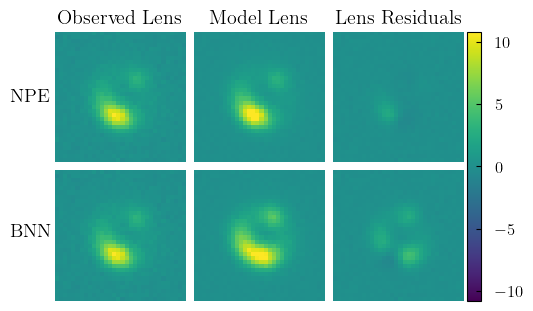

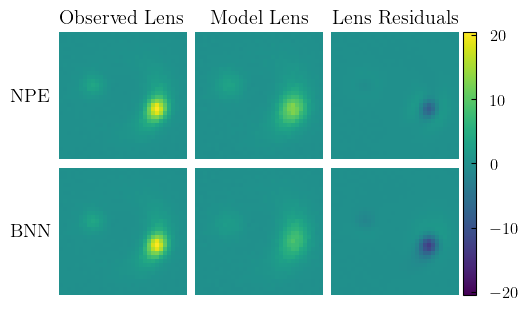

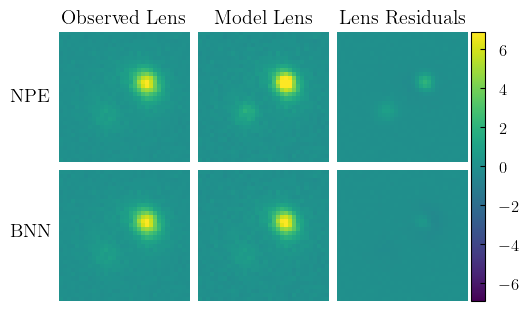

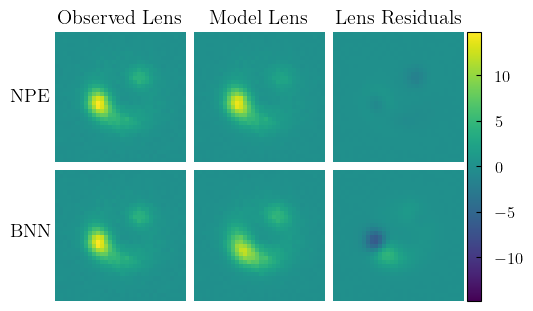

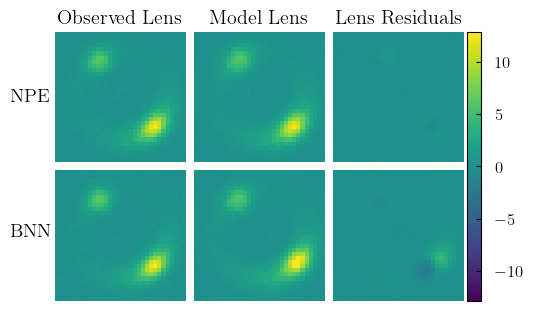

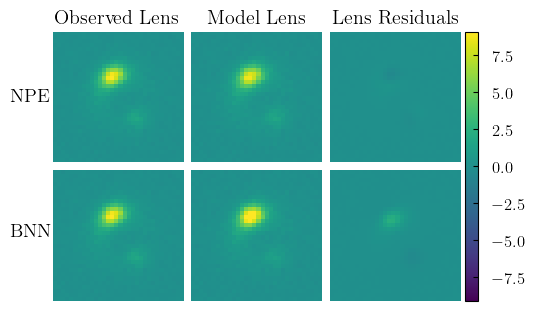

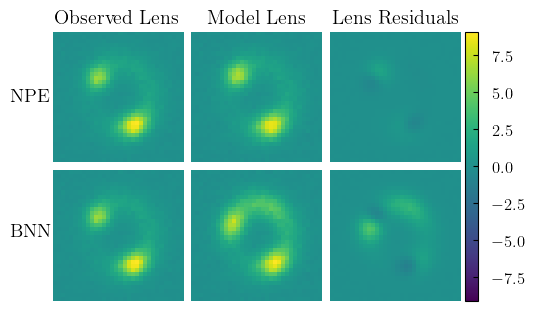

In [ ]:
# Need to define priors for the SBI inference. For simplicity, keep it the same as the training set.
# prior_low = [0.5, -0.6, -0.6, -1, -1]
# prior_high = [3.0, 0.6, 0.6, 1, 1]
%matplotlib inline
rcParams.update({"text.usetex": True})
rcParams['font.family'] = 'serif'

seed = 465
test_number = 1000
weird_index = [[0,1,2,3,8,9,10]]
# weird_index = [[2]]
prior_low = [0.3, -0.2, -0.2, -1,-1]
prior_high = [4.0, 0.2, 0.2, 1, 1]

limits = np.array([prior_low, prior_high])

for i, index in enumerate(np.ravel(weird_index[0])):

  true_theta_E = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g'].to_numpy()[index]
  true_le1 = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-e1-g'].to_numpy()[index]
  true_le2 = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-e2-g'].to_numpy()[index]
  true_x = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-center_x-g'].to_numpy()[index]
  true_y = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-center_y-g'].to_numpy()[index]

  true_smag = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g'].to_numpy()[index]
  true_R = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-R_sersic-g'].to_numpy()[index]
  true_n = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-n_sersic-g'].to_numpy()[index]
  true_se1 = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-e1-g'].to_numpy()[index]
  true_se2 = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-e2-g'].to_numpy()[index]

  # true_parameter = np.array([true_theta_E, true_le1, true_le2, true_x, true_y, true_g1, true_g2, true_smag, true_R, true_n, true_se1, true_se2])

  sample_BNN = BNNsamples[:,index,:]
  samples = np.array(SBI_sample_array[0,index])
  logp = np.array(SBI_logp_array[0,index])
  # map = np.array(SBI_map_array[0,index])
  best_fit_t = SBI_best_fit_arr[0,index,:]
  max_like_t = SBI_max_like_arr[0,index,:]

  config_file_lens = '../SBI_WG/5param_model_test.yaml'
  test_set_model = dl.make_dataset(config_file_lens, return_planes=True)

  config_file_source = '../SBI_WG/5param_model_test_source.yaml'
  source_set_model = dl.make_dataset(config_file_source, return_planes=True)

  # BNN_model = dl.make_dataset(config_file_lens, return_planes=True)

  # sample_new = scaler.inverse_transform(np.asarray(sample_BNN))
  # BNN_model_param = np.median(sample_new, axis=0)
  BNN_model_param = np.median(sample_BNN, axis=0)

  BNN_model_image, BNN_model_source = update_image_source(test_set_model, source_set_model, BNN_model_param, index)

  # SBI_model = dl.make_dataset(config_file_lens, return_planes=True)
  # SBI_model_param = max_like_t #np.median(samples, axis=0)
  SBI_model_param = np.median(samples, axis=0)
  SBI_model_image, SBI_model_source = update_image_source(test_set_model, source_set_model, SBI_model_param,index)

  observed_image = test_set.CONFIGURATION_1_images[:test_number][index][0]
  observed_source = source_set.CONFIGURATION_1_planes[:test_number][index][1,0]

  # plot_residuals_source(observed_image, BNN_model_image, observed_source, BNN_model_source, 'BNN')
  # plt.savefig('single_image_BNN_%s_%s.pdf'%(seed,index),format='pdf')
  # plot_residuals_source(observed_image, SBI_model_image, observed_source, SBI_model_source, 'NPE')
  # plt.savefig('single_image_NPE_%s_%s.pdf'%(seed,index),format='pdf')

  plot_residuals_combined(observed_image, SBI_model_image, observed_source, SBI_model_source, 'NPE', observed_image, BNN_model_image, observed_source, BNN_model_source, 'BNN')
  plt.savefig('5_param_single_image_combined_%s_%s.pdf'%(seed,index),format='pdf',bbox_inches = "tight")

  # SBIsingle = MCSamples(samples=np.array(samples),
  #                             names = [r'\theta_E',r'le1',r'le2',r'x',r'y'],
  #                       labels = [r'\theta_E',r'le1',r'le2',r'x',r'y'])
  # BNNsingle = MCSamples(samples=sample_BNN,
  #                             names = [r'\theta_E',r'le1',r'le2',r'x',r'y'],
  #                       labels = [r'\theta_E',r'le1',r'le2',r'x',r'y'])

  # g = plots.get_subplot_plotter(width_inch=6)
  # g.settings.scaling_factor = 1
  # g.settings.axes_fontsize=10
  # g.settings.axis_tick_x_rotation=60
  # g.settings.axis_tick_y_rotation=60
  # g.settings.scaling_factor = 1
  # g.settings.title_limit_labels = False
  # g.settings.title_limit_fontsize = 10
  # g.settings.axis_marker_lw = 2
  # g.settings.tight_layout = False
  # g.settings.constrained_layout = False
  # g.triangle_plot([SBIsingle,BNNsingle],[r'\theta_E',r'le1',r'le2',r'x',r'y'], legend_labels=['NPE','BNN'],
  #               colors=['tab:blue','tab:orange'],
  #               contour_lws = [1.5,1.5],
  #               line_args=[{'color':'tab:blue'},{'color':'tab:orange'}],
  #                marker_args ={'lw':2},
  #                 markers={r'\theta_E':true_theta_E,r'le1':true_le1,r'le2':true_le2,r'x':true_x,r'y':true_y},
  #                 title_limit=1)
  # plt.savefig('single_image_corner_%s_%s.pdf'%(seed,index),format='pdf')

  # g = plots.get_subplot_plotter(width_inch=6)
  # g.settings.scaling_factor = 1
  # g.settings.axes_fontsize=12
  # g.settings.axis_tick_x_rotation=60
  # g.settings.axis_tick_y_rotation=60
  # g.settings.scaling_factor = 1
  # g.settings.title_limit_labels = False
  # g.settings.title_limit_fontsize = 10
  # g.settings.axis_marker_lw = 2
  # g.settings.tight_layout = True
  # g.settings.constrained_layout = False
  # g.triangle_plot([BNNsingle, SBIsingle],[r'\theta_E',r'le1',r'le2',r'x',r'y'], legend_labels=['BNN','NPE'],
  #               colors=['tab:blue','tab:orange'],
  #               contour_lws = [1.5,1.5],
  #               line_args=[{'color':'tab:blue'},{'color':'tab:orange'}],
  #                marker_args ={'lw':1},
  #                 markers={r'\theta_E':true_theta_E,r'le1':true_le1,r'le2':true_le2,r'x':true_x,r'y':true_y},
  #                 title_limit=1)
  # plt.savefig('single_image_corner_%s_%s_alt.pdf'%(seed,index),format='pdf')
  # print(true_theta_E,true_le1,true_le2,true_x,true_y)

# g = plots.get_subplot_plotter(width_inch=6)
# g.triangle_plot([SBIsamples_plot,BNNsamples_plot],[r'\theta_E','le1','le2','x','y'], legend_labels=['NPE','BNN'],
#                 colors=['tab:blue','tab:orange'],
#                 line_args=[{'color':'tab:blue', 'lw':2},{'color':'tab:orange', 'lw':2}],
#                 contour_lws = [1.5,1.5],
#                 markers={r'\theta_E':0,'le1':0,'le2':0,'x':0,'y':0},
#                 param_limits = {r'\theta_E':[-0.2,0.2],'le1':[-0.2,0.2],'le2':[-0.2,0.2],'x':[-1,1],'y':[-1,1]},
#                 marker_args ={'lw':2},
#                 title_limit=0)
# plt.savefig('5param_corner_465.pdf',format='pdf')


0.15001580836406075 0.04635603559565621
Removed no burn in
Removed no burn in
-0.1380747773020811 0.12700377729077306
Removed no burn in
Removed no burn in
-0.12523649434713097 -0.18514417865889668
Removed no burn in
Removed no burn in
0.10191698059232951 0.1051170584481737
Removed no burn in
Removed no burn in
0.16926697834179133 0.15502388637013154
Removed no burn in
Removed no burn in
-0.1892657344516497 -0.16269498718099676
Removed no burn in
Removed no burn in
-0.11118679174328322 0.043560556526902744
Removed no burn in
Removed no burn in
-0.06135463189526763 0.038894629268955094
Removed no burn in
Removed no burn in
0.07334071706741263 0.07036071276564237
Removed no burn in
Removed no burn in
0.1532678614455743 -0.003635255974132112
Removed no burn in
Removed no burn in
0.10956664902392904 -0.006730830498245549
Removed no burn in
Removed no burn in
-0.172219494371457 -0.06476704583932322
Removed no burn in
Removed no burn in
0.010251122449175032 0.091443400022586
Removed no burn 

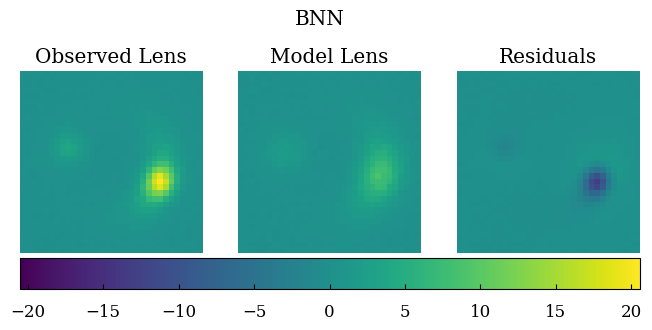

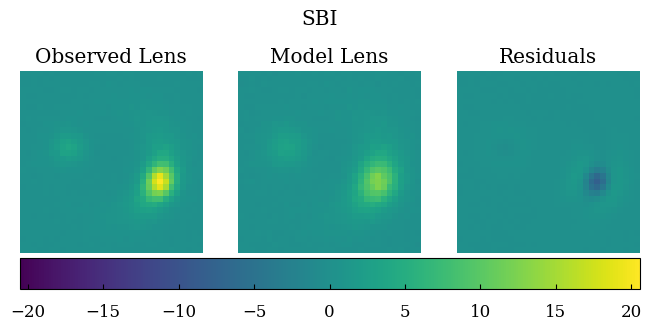

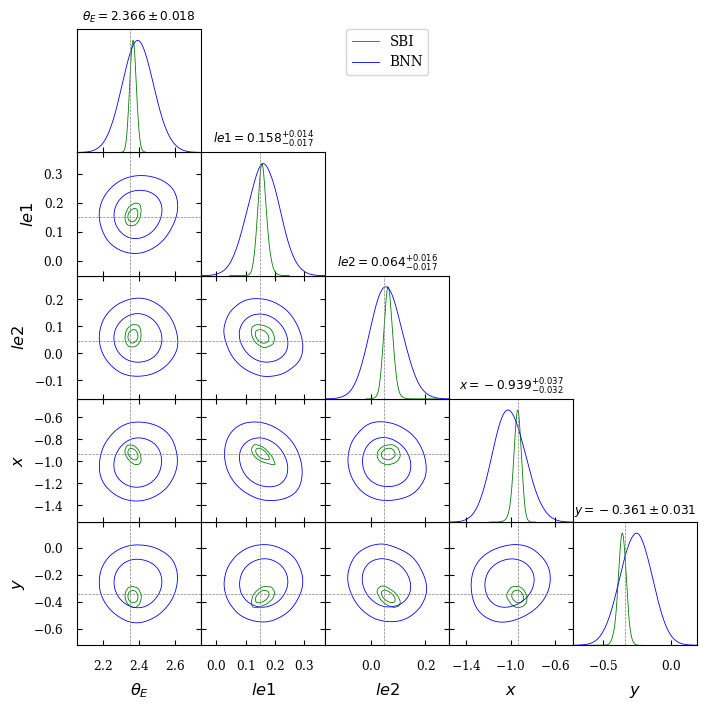

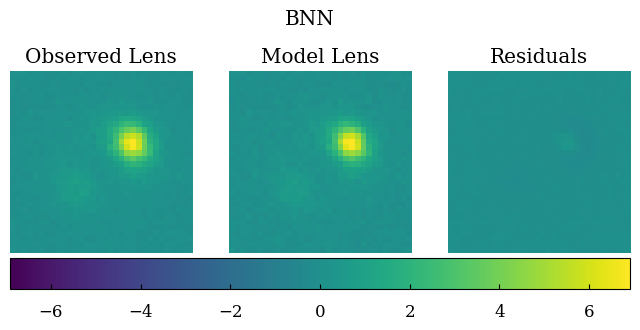

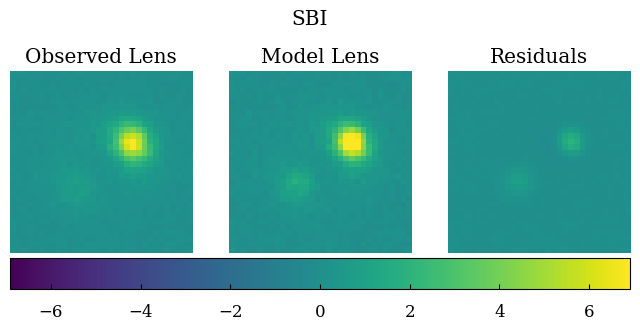

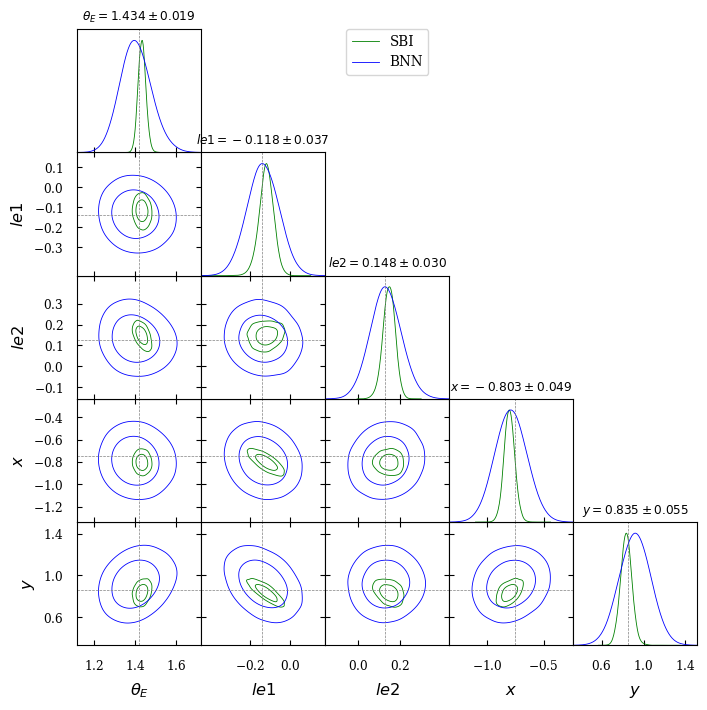

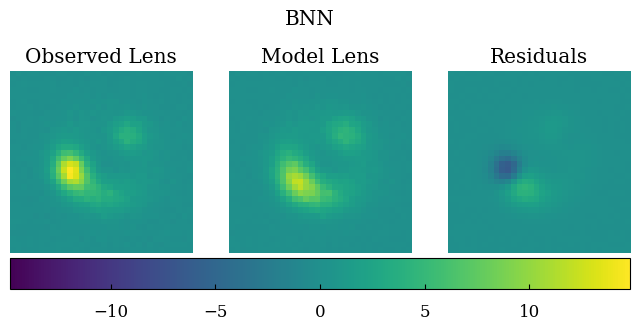

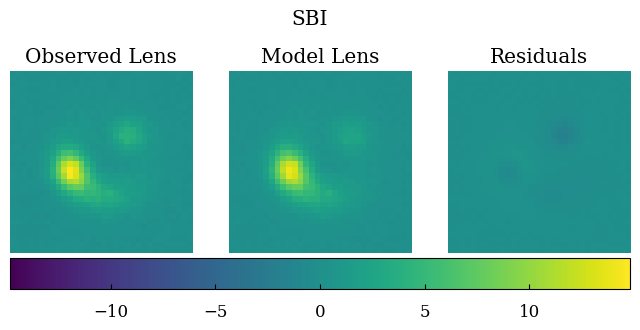

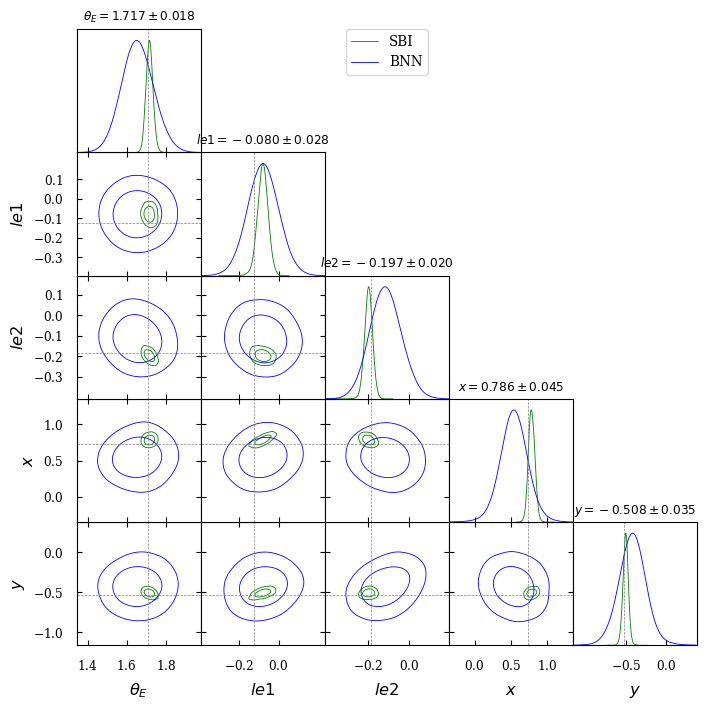

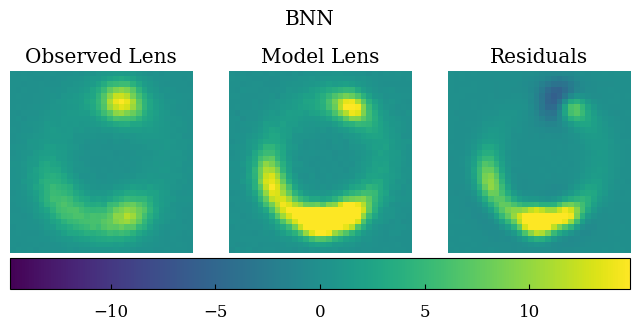

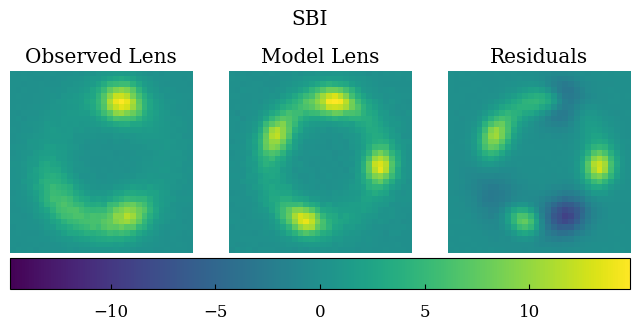

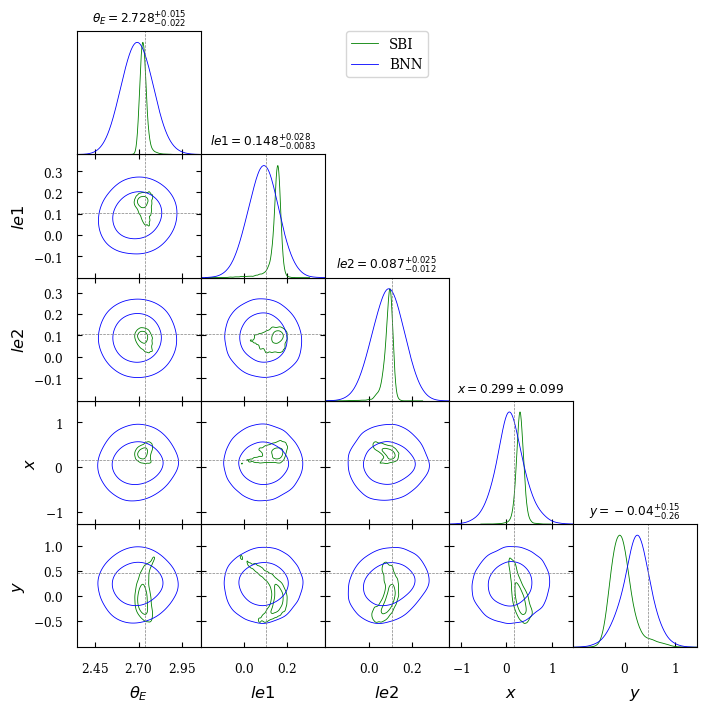

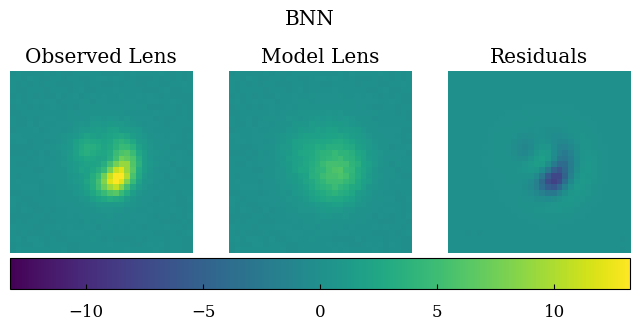

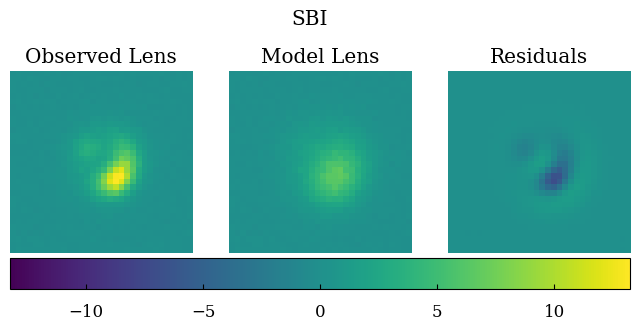

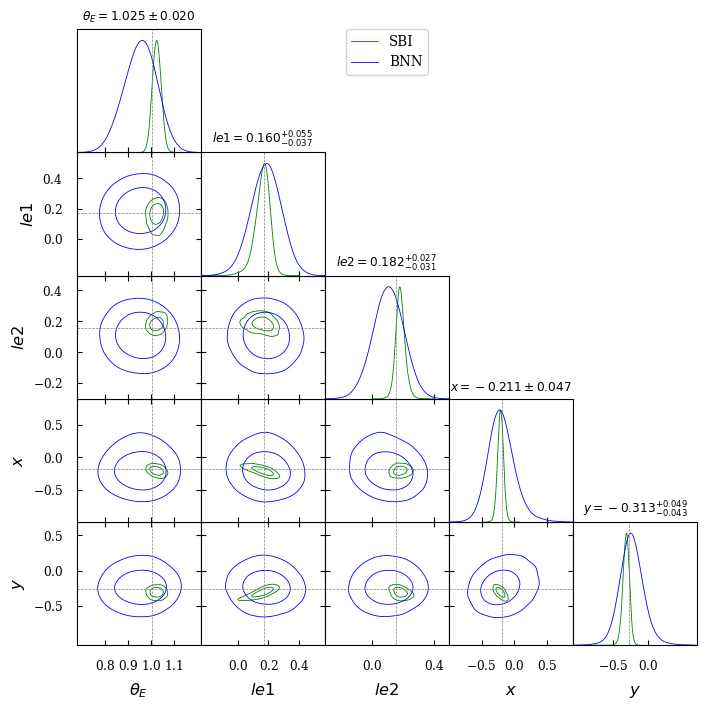

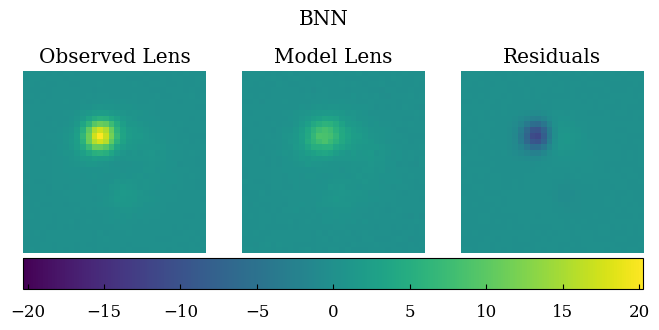

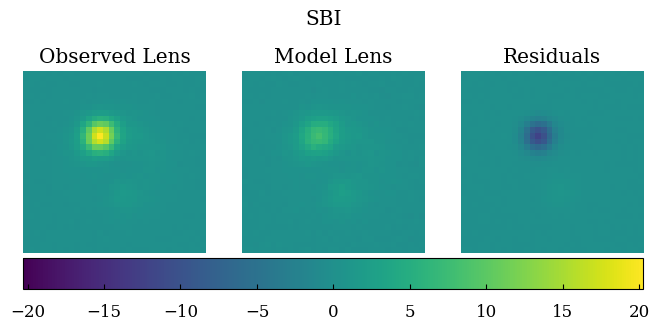

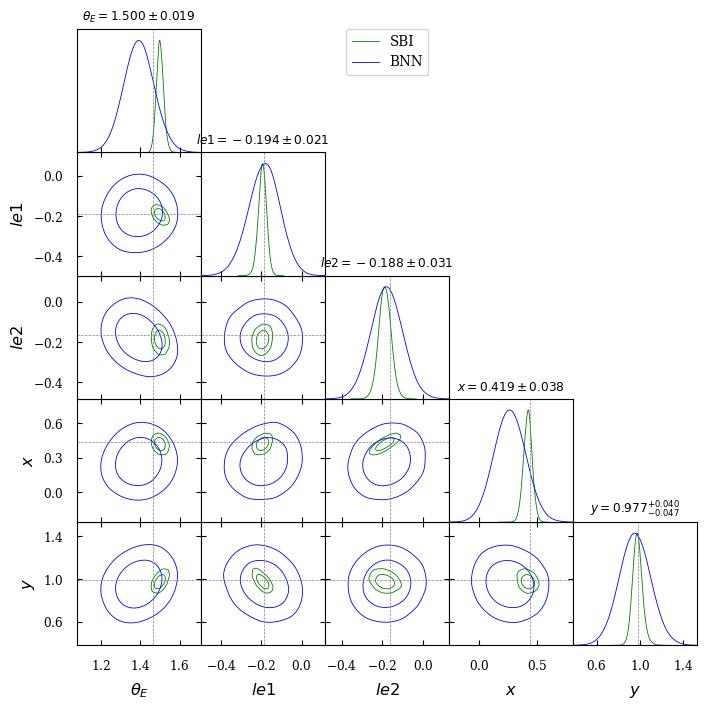

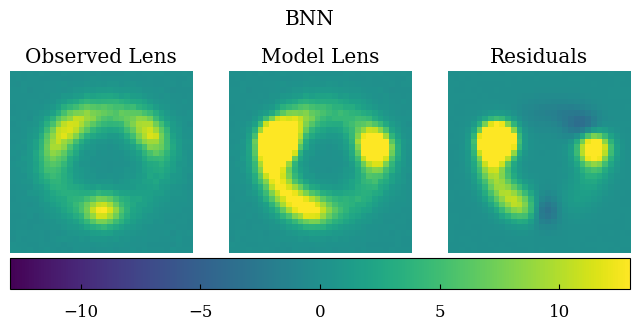

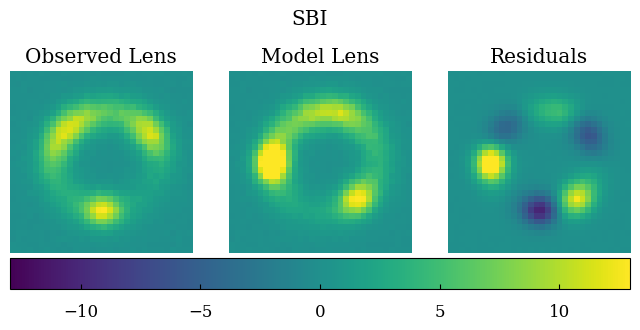

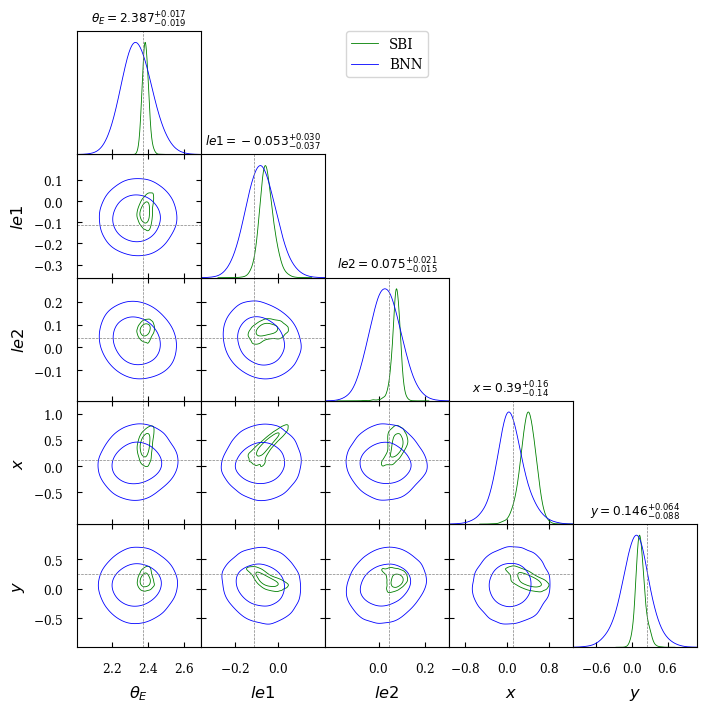

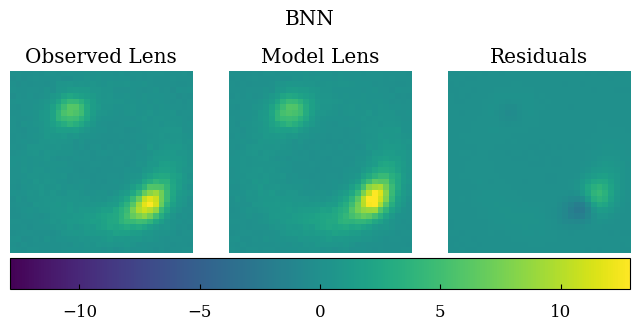

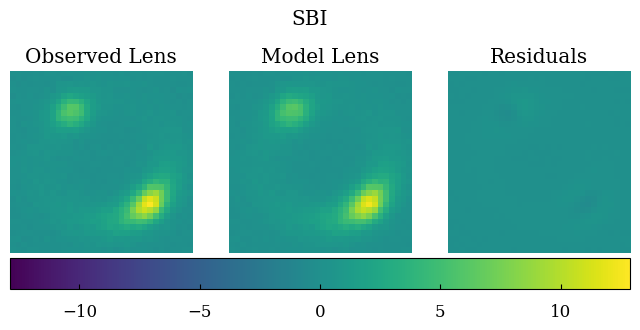

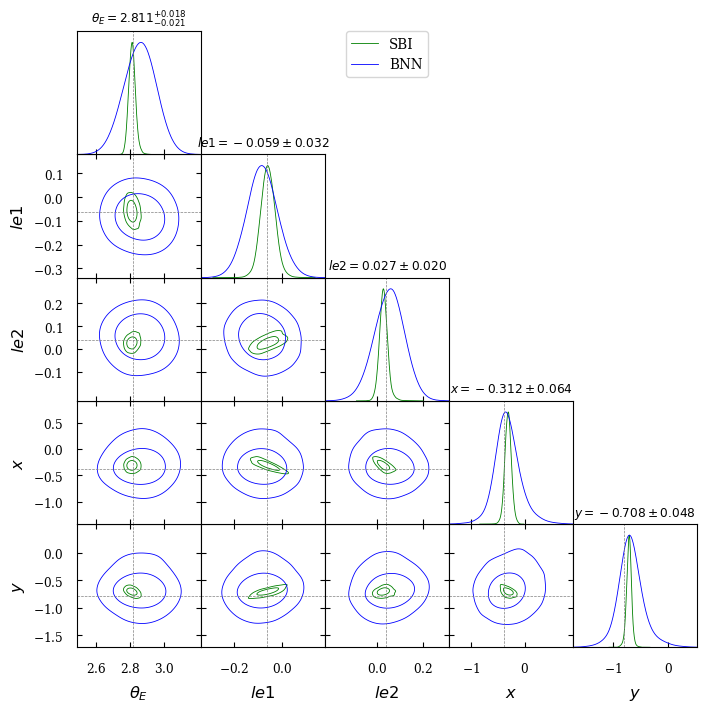

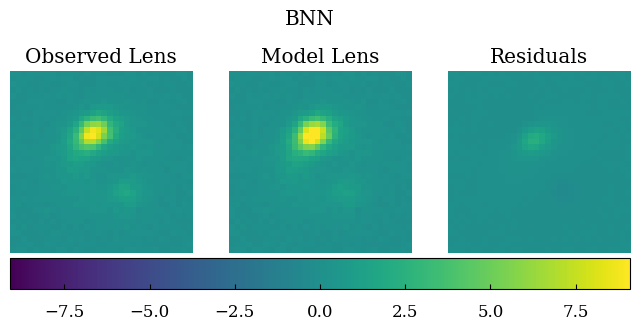

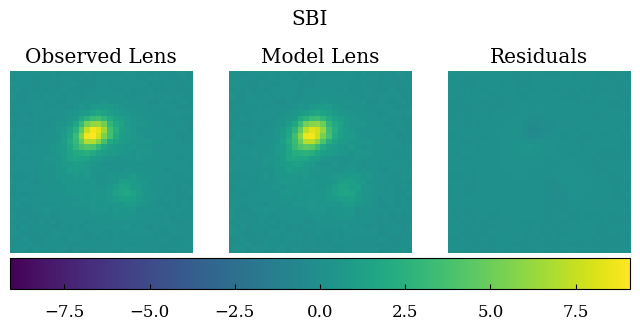

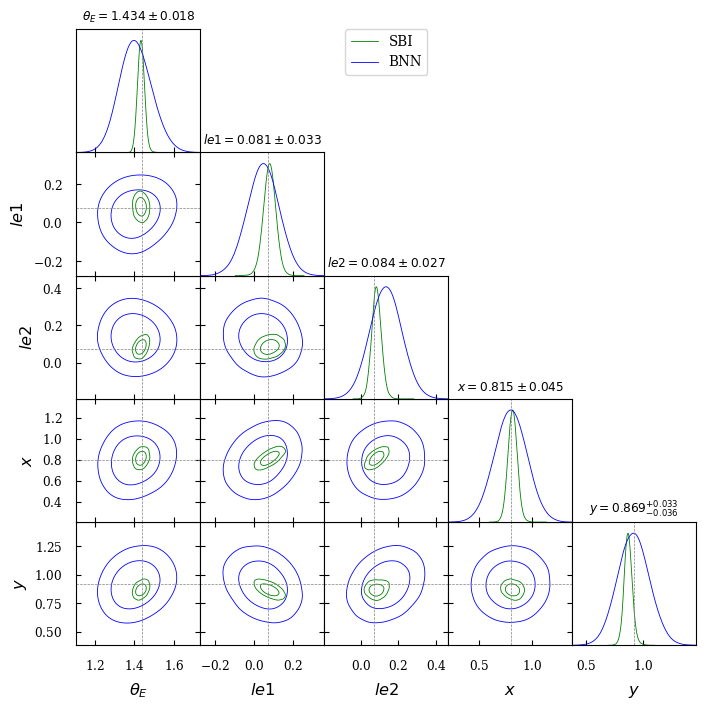

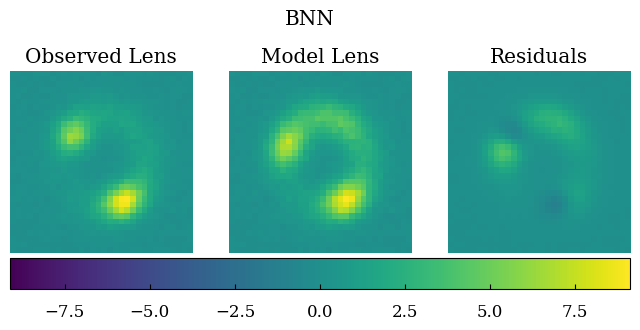

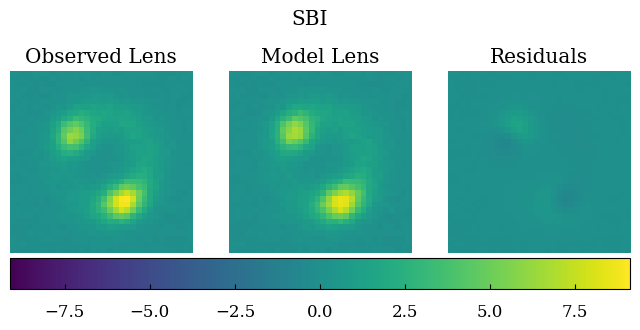

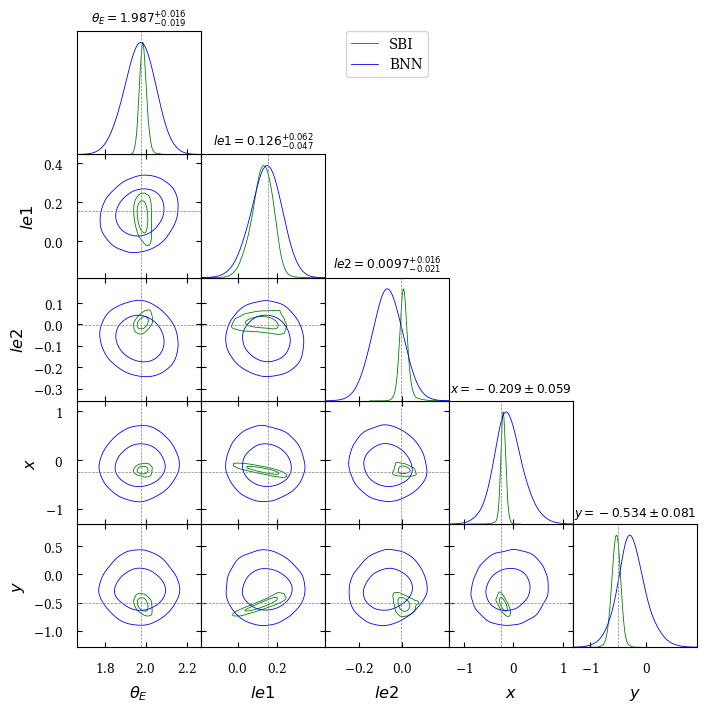

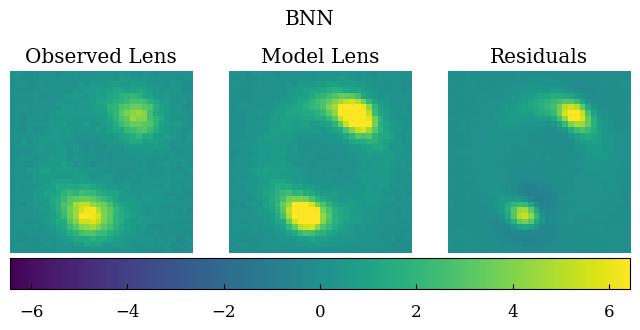

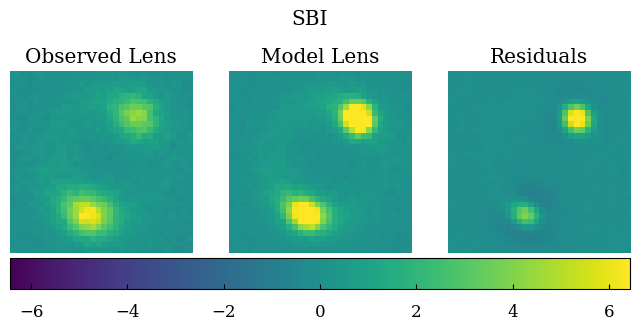

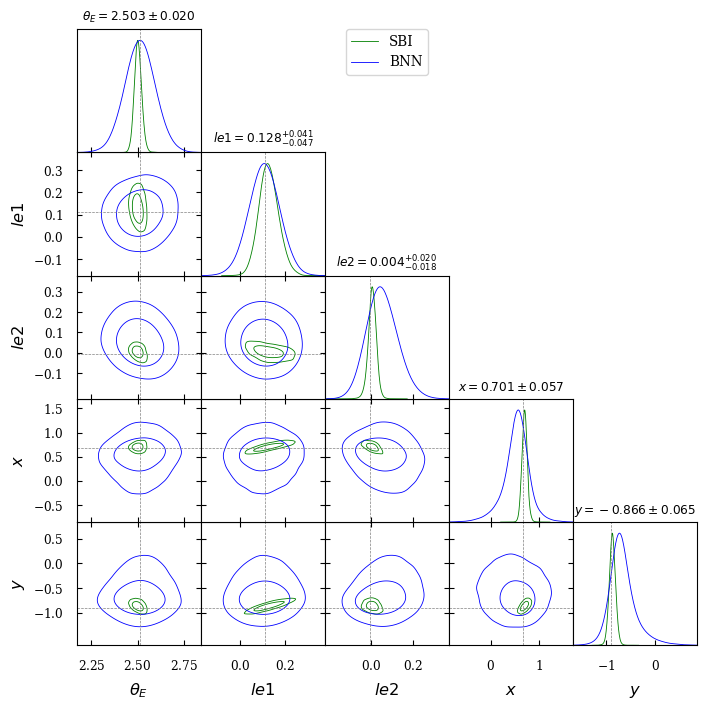

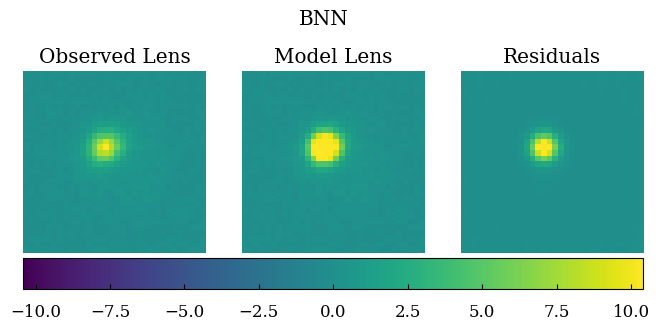

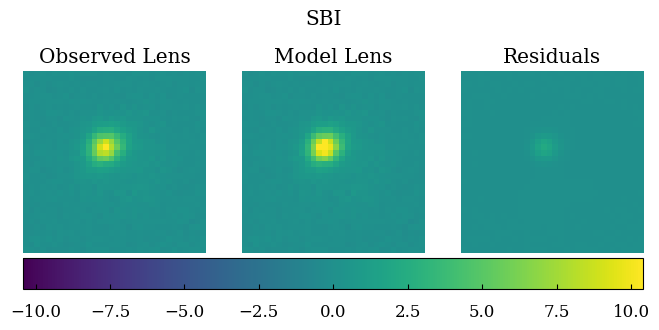

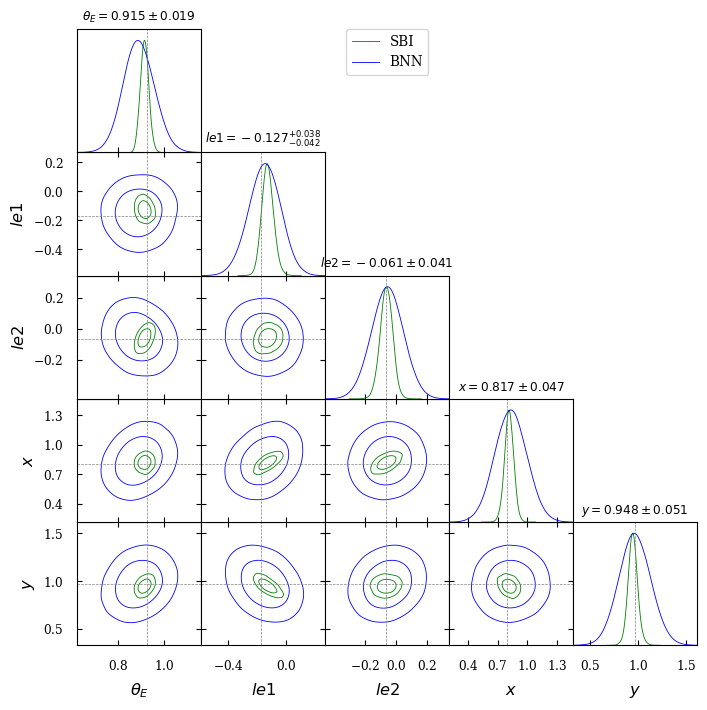

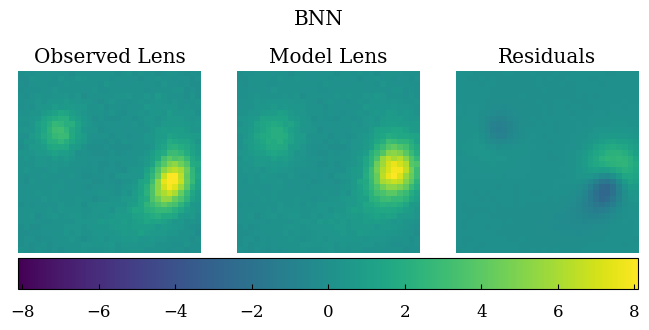

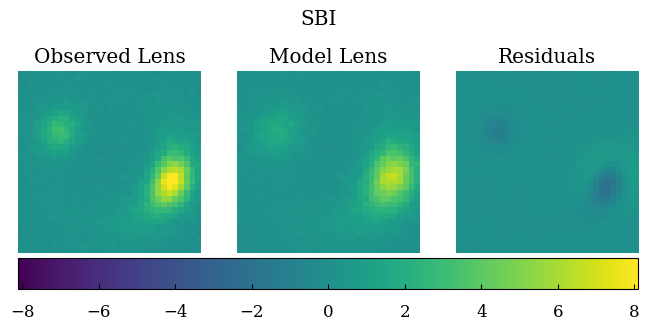

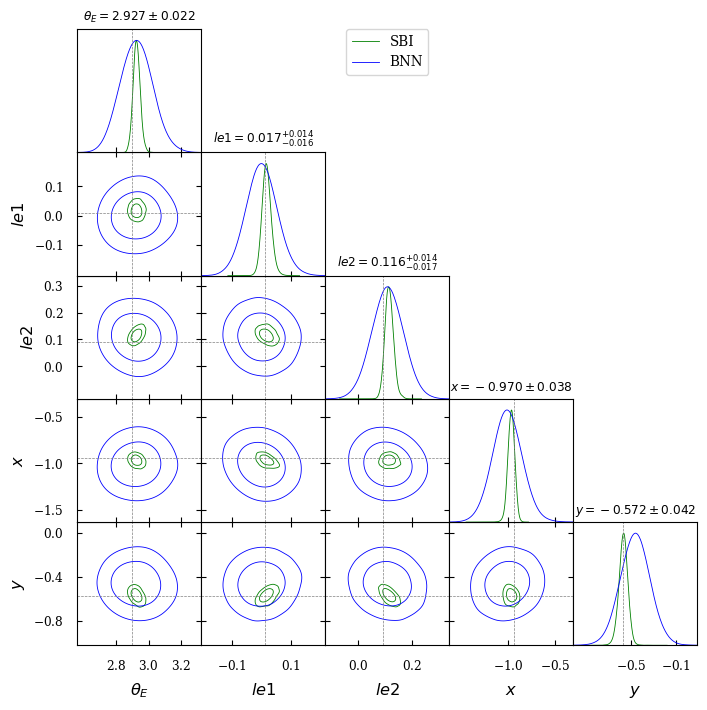

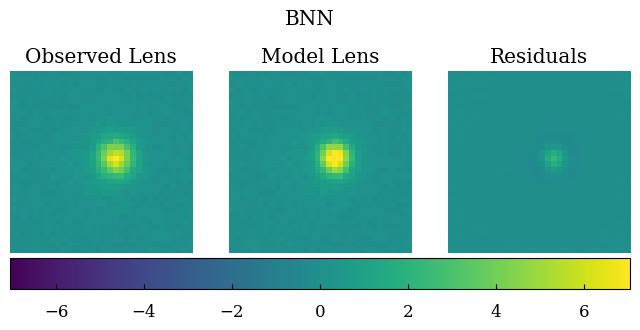

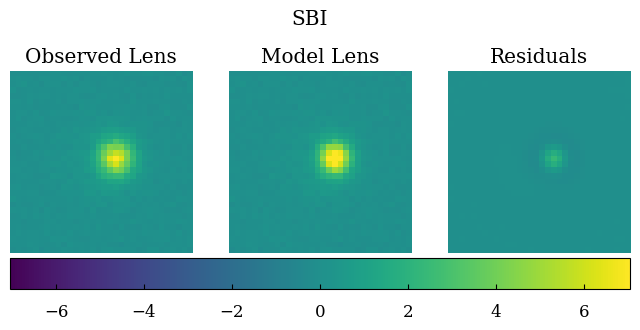

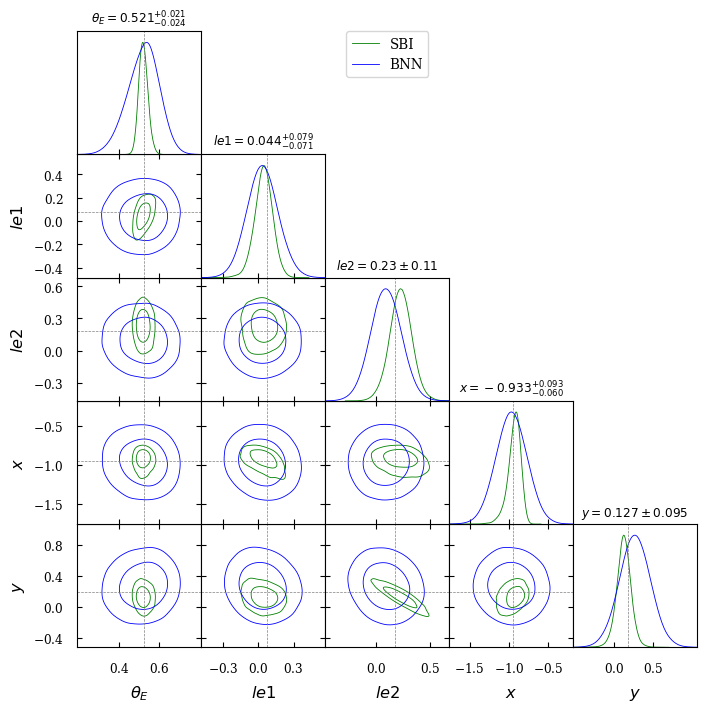

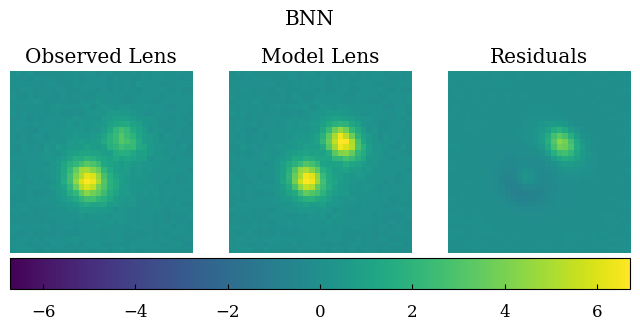

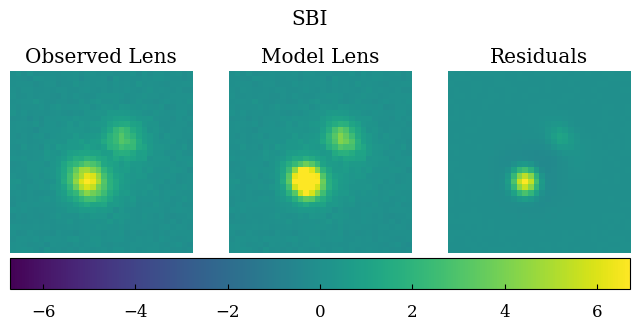

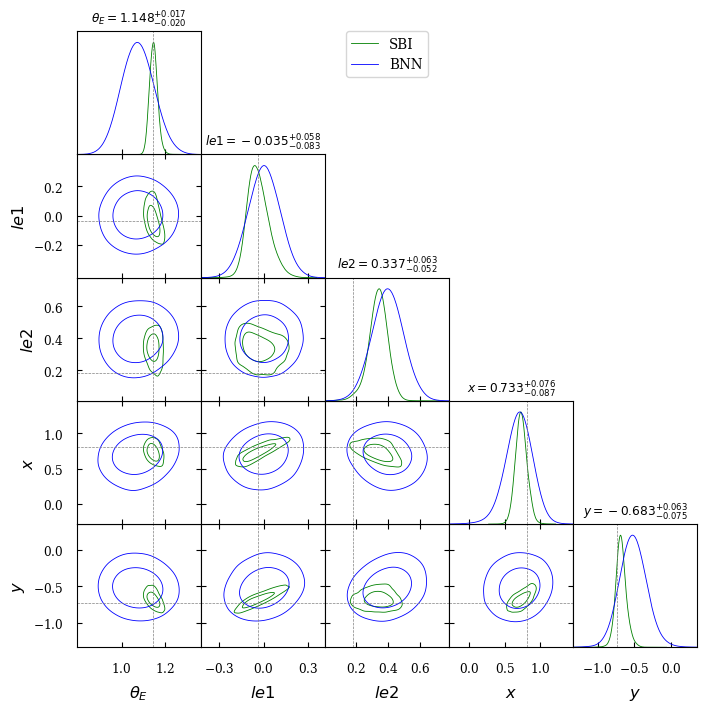

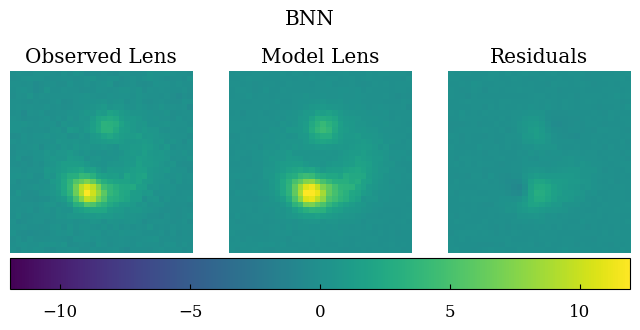

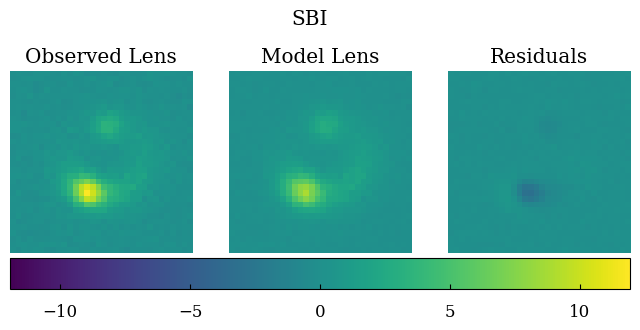

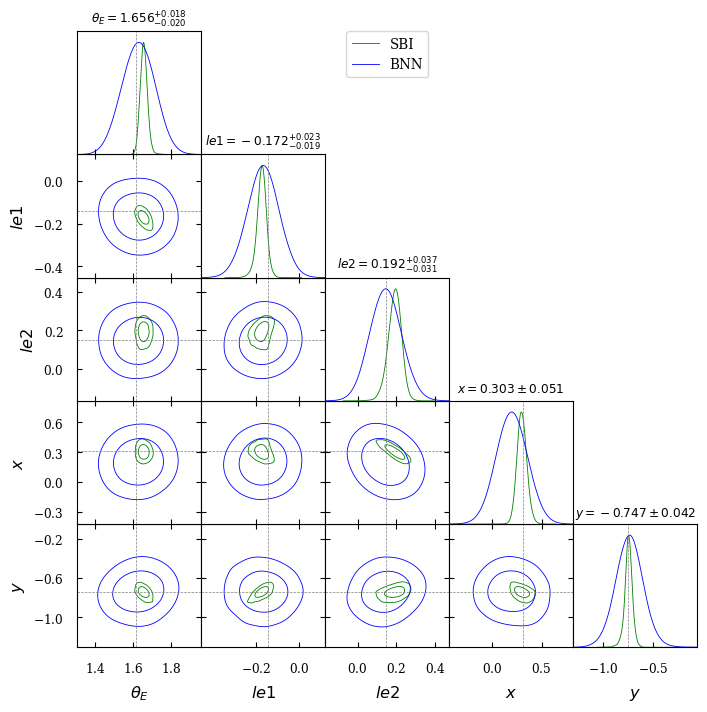

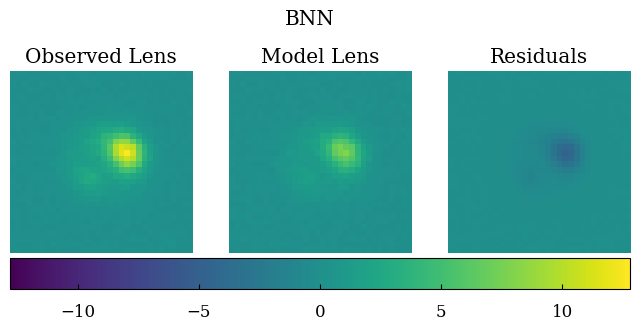

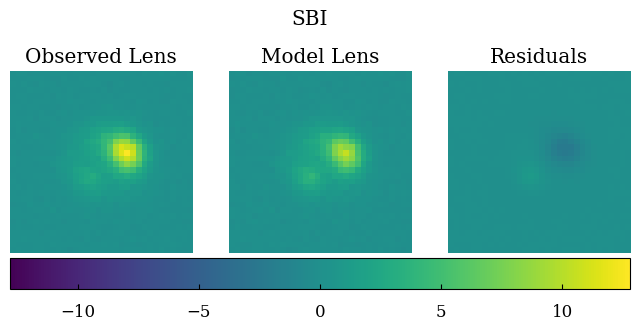

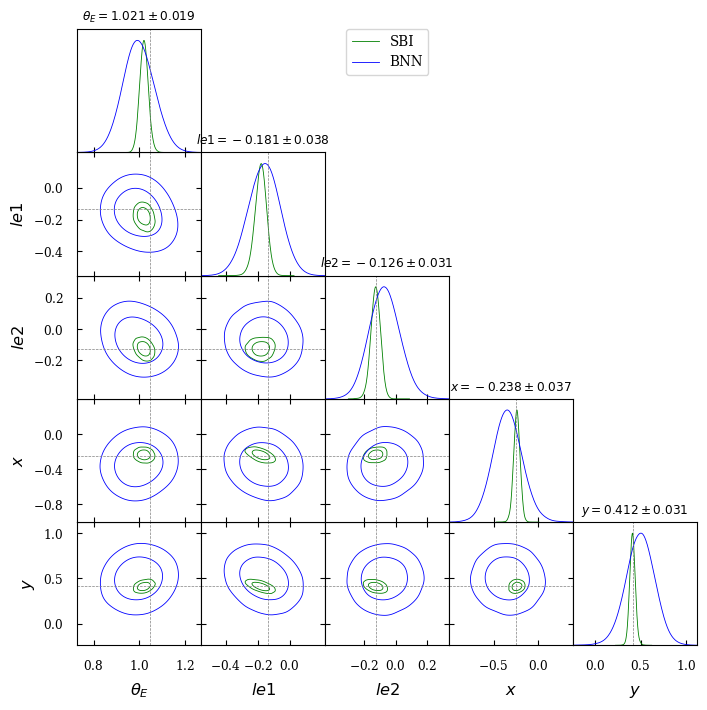

In [ ]:
# Need to define priors for the SBI inference. For simplicity, keep it the same as the training set.
# prior_low = [0.5, -0.6, -0.6, -1, -1]
# prior_high = [3.0, 0.6, 0.6, 1, 1]

test_number = 1000
# weird_index = [[1]]
weird_index = [[1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18]]
prior_low = [0.3, -0.2, -0.2, -1,-1]
prior_high = [4.0, 0.2, 0.2, 1, 1]

limits = np.array([prior_low, prior_high])

for i, index in enumerate(np.ravel(weird_index[0])):

  true_theta_E = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g'].to_numpy()[index]
  true_le1 = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-e1-g'].to_numpy()[index]
  true_le2 = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-e2-g'].to_numpy()[index]
  true_x = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-center_x-g'].to_numpy()[index]
  true_y = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-center_y-g'].to_numpy()[index]

  print(true_le1, true_le2)
  true_smag = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g'].to_numpy()[index]
  true_R = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-R_sersic-g'].to_numpy()[index]
  true_n = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-n_sersic-g'].to_numpy()[index]
  true_se1 = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-e1-g'].to_numpy()[index]
  true_se2 = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-e2-g'].to_numpy()[index]

  # true_parameter = np.array([true_theta_E, true_le1, true_le2, true_x, true_y, true_g1, true_g2, true_smag, true_R, true_n, true_se1, true_se2])

  sample_BNN = BNNsamples[:,index,:]
  samples = np.array(SBI_sample_array[0,index])
  logp = np.array(SBI_logp_array[0,index])
  # map = np.array(SBI_map_array[0,index])
  best_fit_t = SBI_best_fit_arr[0,index,:]
  max_like_t = SBI_max_like_arr[0,index,:]

  config_file_lens = '../SBI_WG/5param_model_test.yaml'
  test_set_model = dl.make_dataset(config_file_lens, return_planes=True)

  config_file_source = '../SBI_WG/5param_model_test_source.yaml'
  source_set_model = dl.make_dataset(config_file_source, return_planes=True)

  # BNN_model = dl.make_dataset(config_file_lens, return_planes=True)

  # sample_new = scaler.inverse_transform(np.asarray(sample_BNN))
  # BNN_model_param = np.median(sample_new, axis=0)
  BNN_model_param = np.median(sample_BNN, axis=0)

  BNN_model_image, BNN_model_source = update_image_source(test_set_model, source_set_model, BNN_model_param, index)

  # SBI_model = dl.make_dataset(config_file_lens, return_planes=True)
  SBI_model_param = np.median(samples, axis=0)
  SBI_model_image, SBI_model_source = update_image_source(test_set_model, source_set_model, SBI_model_param,index)

  observed_image = test_set.CONFIGURATION_1_images[:test_number][index][0]
  observed_source = source_set.CONFIGURATION_1_planes[:test_number][index][1,0]

  plot_residuals_source(observed_image, BNN_model_image, observed_source, BNN_model_source, 'BNN')
  plot_residuals_source(observed_image, SBI_model_image, observed_source, SBI_model_source, 'SBI')

  SBIsingle = MCSamples(samples=np.array(samples),
                              names = [r'\theta_E',r'le1',r'le2',r'x',r'y'],
                        labels = [r'\theta_E',r'le1',r'le2',r'x',r'y'])
  BNNsingle = MCSamples(samples=sample_BNN,
                              names = [r'\theta_E',r'le1',r'le2',r'x',r'y'],
                        labels = [r'\theta_E',r'le1',r'le2',r'x',r'y'])

  g = plots.get_subplot_plotter(width_inch=8)
  g.settings.scaling_factor = 1.2
  g.triangle_plot([SBIsingle,BNNsingle],[r'\theta_E',r'le1',r'le2',r'x',r'y'], legend_labels=['SBI','BNN'],
                  colors=['green','blue'],
                  line_args=[{'color':'green'},{'color':'blue'}],
                  markers={r'\theta_E':true_theta_E,r'le1':true_le1,r'le2':true_le2,r'x':true_x,r'y':true_y},
                  title_limit=1)

In [ ]:
# Need to define priors for the SBI inference. For simplicity, keep it the same as the training set.
# prior_low = [0.5, -0.6, -0.6, -1, -1]
# prior_high = [3.0, 0.6, 0.6, 1, 1]

test_number = 1000
# weird_index = [[1]]
weird_index = [[3]]
prior_low = [0.3, -0.2, -0.2, -1,-1]
prior_high = [4.0, 0.2, 0.2, 1, 1]

limits = np.array([prior_low, prior_high])

for i, index in enumerate(np.ravel(weird_index[0])):

  true_theta_E = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g'].to_numpy()[index]
  true_le1 = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-e1-g'].to_numpy()[index]
  true_le2 = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-e2-g'].to_numpy()[index]
  true_x = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-center_x-g'].to_numpy()[index]
  true_y = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-center_y-g'].to_numpy()[index]

  print(true_le1, true_le2)
  true_smag = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g'].to_numpy()[index]
  true_R = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-R_sersic-g'].to_numpy()[index]
  true_n = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-n_sersic-g'].to_numpy()[index]
  true_se1 = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-e1-g'].to_numpy()[index]
  true_se2 = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-e2-g'].to_numpy()[index]

  # true_parameter = np.array([true_theta_E, true_le1, true_le2, true_x, true_y, true_g1, true_g2, true_smag, true_R, true_n, true_se1, true_se2])

  sample_BNN = BNNsamples[:,index,:]
  samples = np.array(SBI_sample_array[0,index])
  logp = np.array(SBI_logp_array[0,index])
  # map = np.array(SBI_map_array[0,index])
  best_fit_t = SBI_best_fit_arr[0,index,:]
  max_like_t = SBI_max_like_arr[0,index,:]

  config_file_lens = '../SBI_WG/5param_model_test.yaml'
  test_set_model = dl.make_dataset(config_file_lens, return_planes=True)

  config_file_source = '../SBI_WG/5param_model_test_source.yaml'
  source_set_model = dl.make_dataset(config_file_source, return_planes=True)

  # BNN_model = dl.make_dataset(config_file_lens, return_planes=True)

  # sample_new = scaler.inverse_transform(np.asarray(sample_BNN))
  # BNN_model_param = np.median(sample_new, axis=0)
  BNN_model_param = np.median(sample_BNN, axis=0)

  BNN_model_image, BNN_model_source = update_image_source(test_set_model, source_set_model, BNN_model_param, index)

  # SBI_model = dl.make_dataset(config_file_lens, return_planes=True)
  SBI_model_param = np.median(samples, axis=0)
  SBI_model_image, SBI_model_source = update_image_source(test_set_model, source_set_model, SBI_model_param,index)

  observed_image = test_set.CONFIGURATION_1_images[:test_number][index][0]
  observed_source = source_set.CONFIGURATION_1_planes[:test_number][index][1,0]

  plot_residuals_source(observed_image, BNN_model_image, observed_source, BNN_model_source, 'BNN')
  plot_residuals_source(observed_image, SBI_model_image, observed_source, SBI_model_source, 'SBI')

  SBIsingle = MCSamples(samples=np.array(samples),
                              names = [r'\theta_E',r'le1',r'le2',r'x',r'y'],
                        labels = [r'\theta_E',r'le1',r'le2',r'x',r'y'])
  BNNsingle = MCSamples(samples=sample_BNN,
                              names = [r'\theta_E',r'le1',r'le2',r'x',r'y'],
                        labels = [r'\theta_E',r'le1',r'le2',r'x',r'y'])

  g = plots.get_subplot_plotter(width_inch=15)
  g.settings.scaling_factor = 1.7
  g.triangle_plot([SBIsingle,BNNsingle],[r'\theta_E',r'le1',r'le2',r'x',r'y'], legend_labels=['SBI','BNN'],
                  colors=['green','blue'],
                  line_args=[{'color':'green'},{'color':'blue'}],
                  markers={r'\theta_E':true_theta_E,r'le1':true_le1,r'le2':true_le2,r'x':true_x,r'y':true_y},
                  title_limit=1)

  g = plots.get_subplot_plotter(width_inch=15)
  g.settings.scaling_factor = 1.7
  g.triangle_plot([BNNsingle, SBIsingle],[r'\theta_E',r'le1',r'le2',r'x',r'y'], legend_labels=['BNN','SBI'],
                  colors=['blue','green'],
                  line_args=[{'color':'blue'},{'color':'green'}],
                  markers={r'\theta_E':true_theta_E,r'le1':true_le1,r'le2':true_le2,r'x':true_x,r'y':true_y},
                  title_limit=1)
  print(true_theta_E,true_le1,true_le2,true_x,true_y)

-0.12523649434713097 -0.18514417865889668


KeyboardInterrupt: ignored

In [ ]:

test_number = 1000
prior_low = [0.3, -0.8, -0.8, -2, -2, -0.6, -0.6, 22, 0.1, 0.5, -0.8, -0.8]
prior_high = [4.0, 0.8, 0.8, 2, 2, 0.6, 0.6, 27, 3, 8, 0.8, 0.8]

prior_low = [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]
prior_high = [1,1,1,1,1,1,1,1,1,1,1,1]

limits = np.array([prior_low, prior_high]).T


# Now let's make a vector of the median (one definition of "best-fit") values of the posterior for each parameter
# best_fit = []
# for i in range(12):
#   best_fit.append(np.median(samples[:,i].cpu()))
# best_fit_t = torch.tensor(best_fit)


true_theta_E = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g'].to_numpy()[:test_number]
true_le1 = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-e1-g'].to_numpy()[:test_number]
true_le2 = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-e2-g'].to_numpy()[:test_number]
true_x = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-center_x-g'].to_numpy()[:test_number]
true_y = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-center_y-g'].to_numpy()[:test_number]

# true_g1 = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-SHEAR_PROFILE_1-gamma1-g'].to_numpy()[:test_number]
# true_g2 = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-SHEAR_PROFILE_1-gamma2-g'].to_numpy()[:test_number]

# true_smag = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g'].to_numpy()[:test_number]
# true_R = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-R_sersic-g'].to_numpy()[:test_number]
# true_n = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-n_sersic-g'].to_numpy()[:test_number]
# true_se1 = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-e1-g'].to_numpy()[:test_number]
# true_se2 = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-e2-g'].to_numpy()[:test_number]

true_parameter = np.array([true_theta_E, true_le1, true_le2, true_x, true_y])

best_fit_t_diff = SBI_best_fit_arr[0,:test_number,:]-true_parameter.T
max_cut = SBI_max_like_arr[0,:test_number,:]-true_parameter.T
max_cut_ext = np.append(max_cut, SBI_max_like_arr[0,:test_number,:],axis=1)

error = SBI_percentile68u_arr[0,:test_number,:] - SBI_percentile68l_arr[0,:test_number,:]

max_cut_norm = max_cut/error
max_cut_ext_norm = np.append(max_cut_norm, SBI_max_like_arr[0,:test_number,:], axis=1)

pred_med_array = np.median(BNNsamples,axis=0)

BNN_diff = pred_med_array-true_parameter.T

BNN_diff_ext = np.append(BNN_diff, pred_med_array[:test_number,:], axis=1)

BNN_error = np.percentile(BNNsamples,84,axis=0) - np.percentile(BNNsamples,16,axis=0)

BNN_diff_norm = BNN_diff/BNN_error
BNN_diff_ext_norm = np.append(BNN_diff_norm, pred_med_array[:test_number,:], axis=1)

# map = []
# for j in range(len(SBI_map_array[0])):
#   map.append(SBI_map_array[0,j].numpy())

# map_diff = map-true_parameter.T

from getdist import plots, MCSamples
from getdist.styles.tab10 import style_name
plots.set_active_style(style_name)

SBIsamples_plot = MCSamples(samples=max_cut_ext,
                       names = [r'\theta_E','le1','le2','x','y',r'\theta_E_t','le1_t','le2_t','x_t','y_t'],
                       labels = [r'\Delta \theta_E','\Delta le1','\Delta le2','\Delta x','\Delta y',r'\theta_E_t','le1_t','le2_t','x_t','y_t'])

SBIsamples_plot_norm = MCSamples(samples=max_cut_ext_norm,
                            names = [r'\theta_E','le1','le2','x','y',r'\theta_E_t','le1_t','le2_t','x_t','y_t'],
                      labels = [r'\theta_E','le1','le2','x','y',r'\theta_E_t','le1_t','le2_t','x_t','y_t'])

BNNsamples_plot = MCSamples(samples=BNN_diff_ext,names = [r'\theta_E','le1','le2','x','y',r'\theta_E_t','le1_t','le2_t','x_t','y_t'],
                       labels = [r'\Delta theta_E','\Delta le1','\Delta le2','\Delta x','\Delta y',r'\theta_E_t','le1_t','le2_t','x_t','y_t'])

BNNsamples_plot_norm = MCSamples(samples=BNN_diff_ext_norm,names = [r'\theta_E','le1','le2','x','y',r'\theta_E_t','le1_t','le2_t','x_t','y_t'],
                       labels = [r'\theta_E','le1','le2','x','y',r'\theta_E_t','le1_t','le2_t','x_t','y_t'])

# 3D (scatter) triangle plot
# g = plots.get_subplot_plotter(width_inch=6)
# g.settings.scaling_factor = 2
# g.triangle_plot([SBIsamples_plot,BNNsamples_plot],[r'\theta_E','le1','le2','x','y'], legend_labels=['SBI','BNN'],
#                 colors=['tab:blue','tab:orange'],
#                 line_args=[{'color':'tab:blue'},{'color':'tab:orange'},lws=[2,2]],
#                 markers={r'\theta_E':0,'le1':0,'le2':0,'x':0,'y':0},
#                 title_limit=1)

# g = plots.get_subplot_plotter(width_inch=6)
# g.settings.scaling_factor = 2
# g.triangle_plot([BNNsamples_plot, SBIsamples_plot],[r'\theta_E','le1','le2','x','y'], legend_labels=['SBI','BNN'],
#                 colors=['green','blue'],
#                 line_args=[{'color':'green'},{'color':'blue'}],
#                 markers={r'\theta_E':0,'le1':0,'le2':0,'x':0,'y':0},
#                 title_limit=1)


# g = plots.get_subplot_plotter(width_inch=6)
# g.settings.scaling_factor = 1
# g.settings.tight_layout=True
# g.triangle_plot([SBIsamples_plot_norm,BNNsamples_plot_norm],[r'\theta_E','le1','le2','x','y'], legend_labels=['SBI','BNN'],
#                 colors=['tab:blue','tab:orange'],
#                 line_args=[{'color':'tab:blue'},{'color':'tab:orange'},lws=[2,2]],
#                 markers={r'\theta_E':0,'le1':0,'1e2':0,'x':0,'y':0},
#                 title_limit=1)

# g = plots.get_subplot_plotter(width_inch=16)
# g.settings.scaling_factor = 1.5
# g.settings.tight_layout=True
# g.triangle_plot([BNNsamples_plot_norm,SBIsamples_plot_norm],[r'\theta_E','le1','1e2','x','y'], legend_labels=['BNN','SBI'],
#                 colors=['green','blue'],
#                 line_args=[{'color':'green'},{'color':'blue'}],
#                 markers={r'\theta_E':0,'le1':0,'1e2':0,'x':0,'y':0},
#                 title_limit=1)


# g.triangle_plot([BNNsamples],[r'\theta_E','le1','1e2','x','y','g1','g2','smag','R','n','se1','se2'], plot_3d_with_param=r'smag_t', legend_labels=['BNN'],
#                 markers={r'\theta_E':0,'le1':0,'1e2':0,'x':0,'y':0,'g1':0,'g2':0,'smag':0,'R':0,'n':0,'se1':0,'se2':0},
#                 title_limit=1)

# g = plots.get_subplot_plotter(width_inch=16)
# g.settings.scaling_factor = 1
# g.triangle_plot([SBIsamples_norm],[r'\theta_E','le1','1e2','x','y','g1','g2','smag','R','n','se1','se2'], plot_3d_with_param=r'smag_t', legend_labels=['SBI'],
#                 markers={r'\theta_E':0,'le1':0,'1e2':0,'x':0,'y':0,'g1':0,'g2':0,'smag':0,'R':0,'n':0,'se1':0,'se2':0},
#                 title_limit=1)

# g = plots.get_subplot_plotter()
# g.settings.scaling_factor = 0.2
# g.triangle_plot([SBIsamples_err], plot_3d_with_param=r'\theta_E', legend_labels=['SBI'],
#                 markers={r'\theta_E':0,'le1':0,'1e2':0,'x':0,'y':0,'g1':0,'g2':0,'smag':0,'R':0,'n':0,'se1':0,'se2':0},
#                 title_limit=1)

# c = cc.ChainConsumer()
# c.add_chain(max_cut, parameters=[r'$\theta_E$',r'$le1$',r'$1e2$',r'x',r'y',r'g1',r'g2',r'smag',r'R',r'n',r'se1',r'se2'], name = 'SBI')
# c.add_chain(BNN_diff, parameters=[r'$\theta_E$',r'$le1$',r'$1e2$',r'x',r'y',r'g1',r'g2',r'smag',r'R',r'n',r'se1',r'se2'], name= 'BNN')
# c.configure(cloud=True, sigmas=[0,1])
# fig = c.plotter.plot(truth=[0,0,0,0,0,0,0,0,0,0,0,0])

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


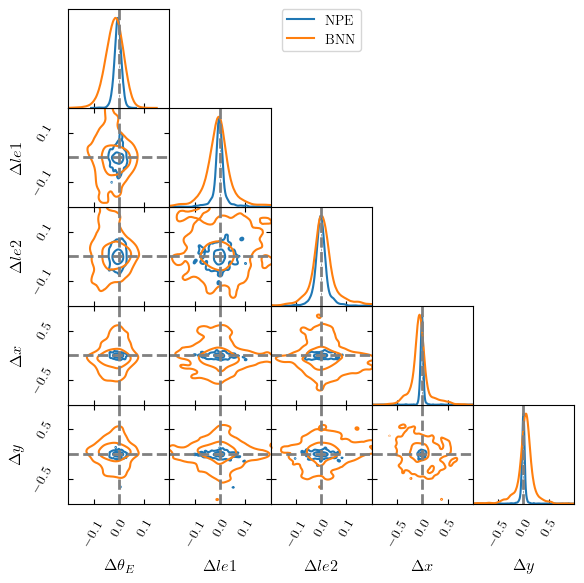

In [ ]:
g = plots.get_subplot_plotter(width_inch=6)
g.settings.axes_fontsize=12
g.settings.axis_tick_x_rotation=60
g.settings.axis_tick_y_rotation=60
g.settings.scaling_factor = 1
g.settings.linewidth=2
g.triangle_plot([SBIsamples_plot,BNNsamples_plot],[r'\theta_E','le1','le2','x','y'], legend_labels=['NPE','BNN'],
                colors=['tab:blue','tab:orange'],
                line_args=[{'color':'tab:blue', 'lw':2},{'color':'tab:orange', 'lw':2}],
                contour_lws = [1.5,1.5],
                markers={r'\theta_E':0,'le1':0,'le2':0,'x':0,'y':0},
                param_limits = {r'\theta_E':[-0.2,0.2],'le1':[-0.2,0.2],'le2':[-0.2,0.2],'x':[-1,1],'y':[-1,1]},
                marker_args ={'lw':2},
                title_limit=0)
for i in range(len(g.subplots[0,:])):
  g.subplots[i,i].axvline(color='gray', ls='--', lw=2)
plt.savefig('5param_corner_%s.pdf'%seed,format='pdf')


# g = plots.get_subplot_plotter(width_inch=6)
# g.settings.scaling_factor = 1
# g.settings.tight_layout=True
# g.triangle_plot([SBIsamples_plot_norm,BNNsamples_plot_norm],[r'\theta_E','le1','le2','x','y'], legend_labels=['SBI','BNN'],
#                 colors=['tab:blue','tab:orange'],
#                 line_args=[{'color':'tab:blue'},{'color':'tab:orange'}],
#                 markers={r'\theta_E':0,'le1':0,'1e2':0,'x':0,'y':0},
#                 title_limit=1)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


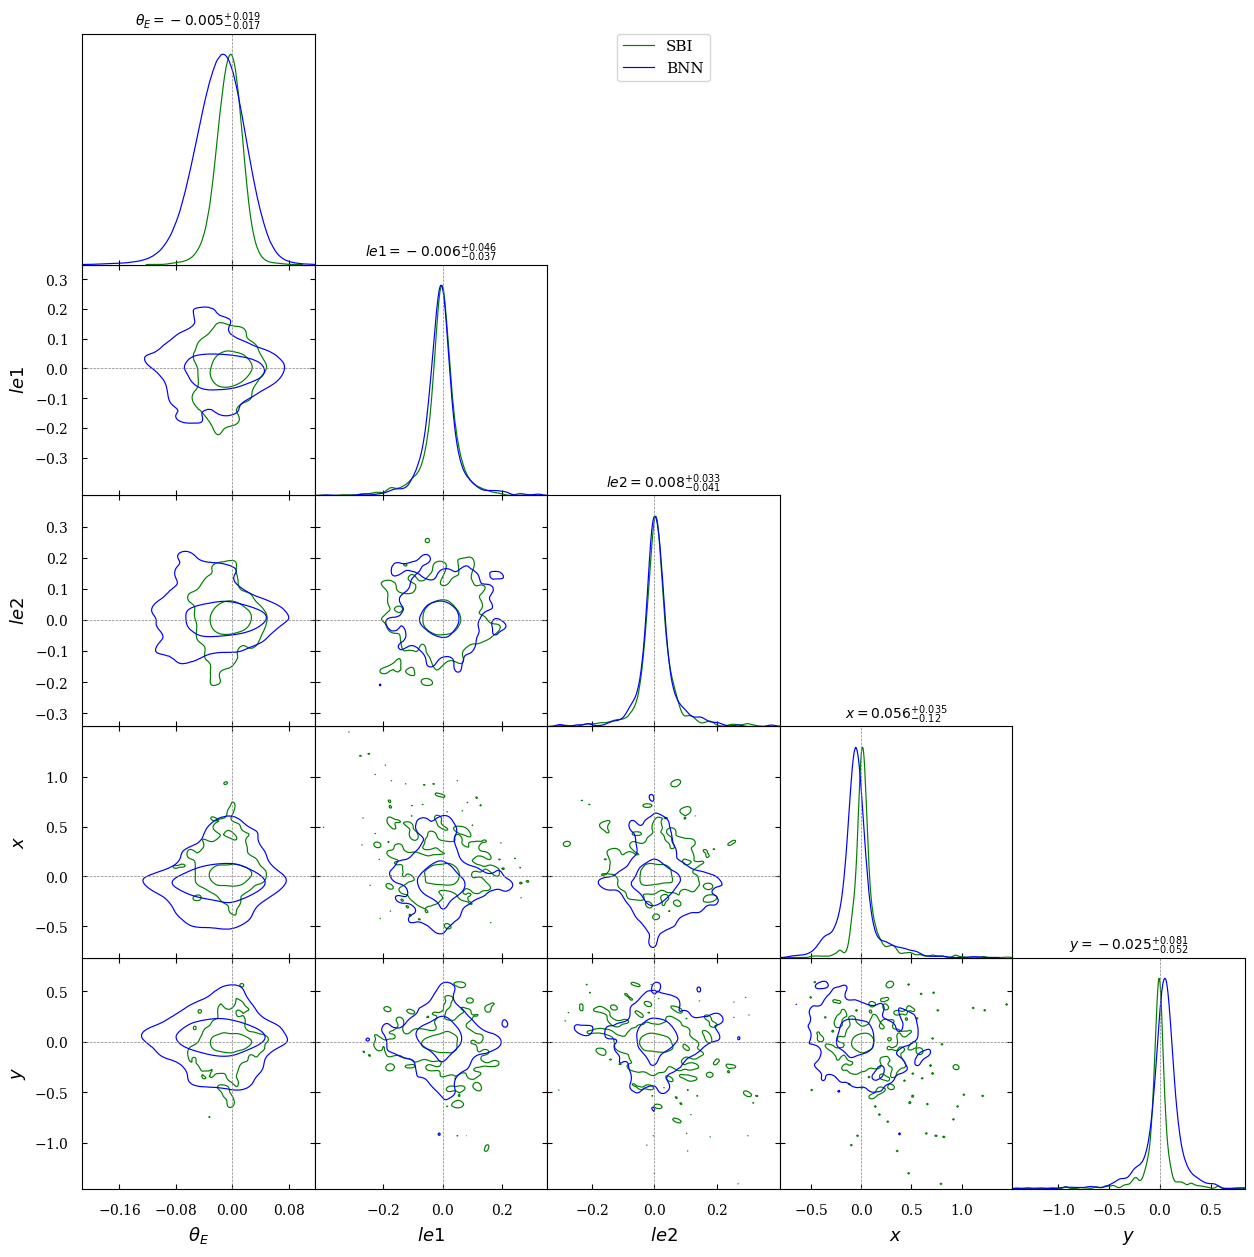

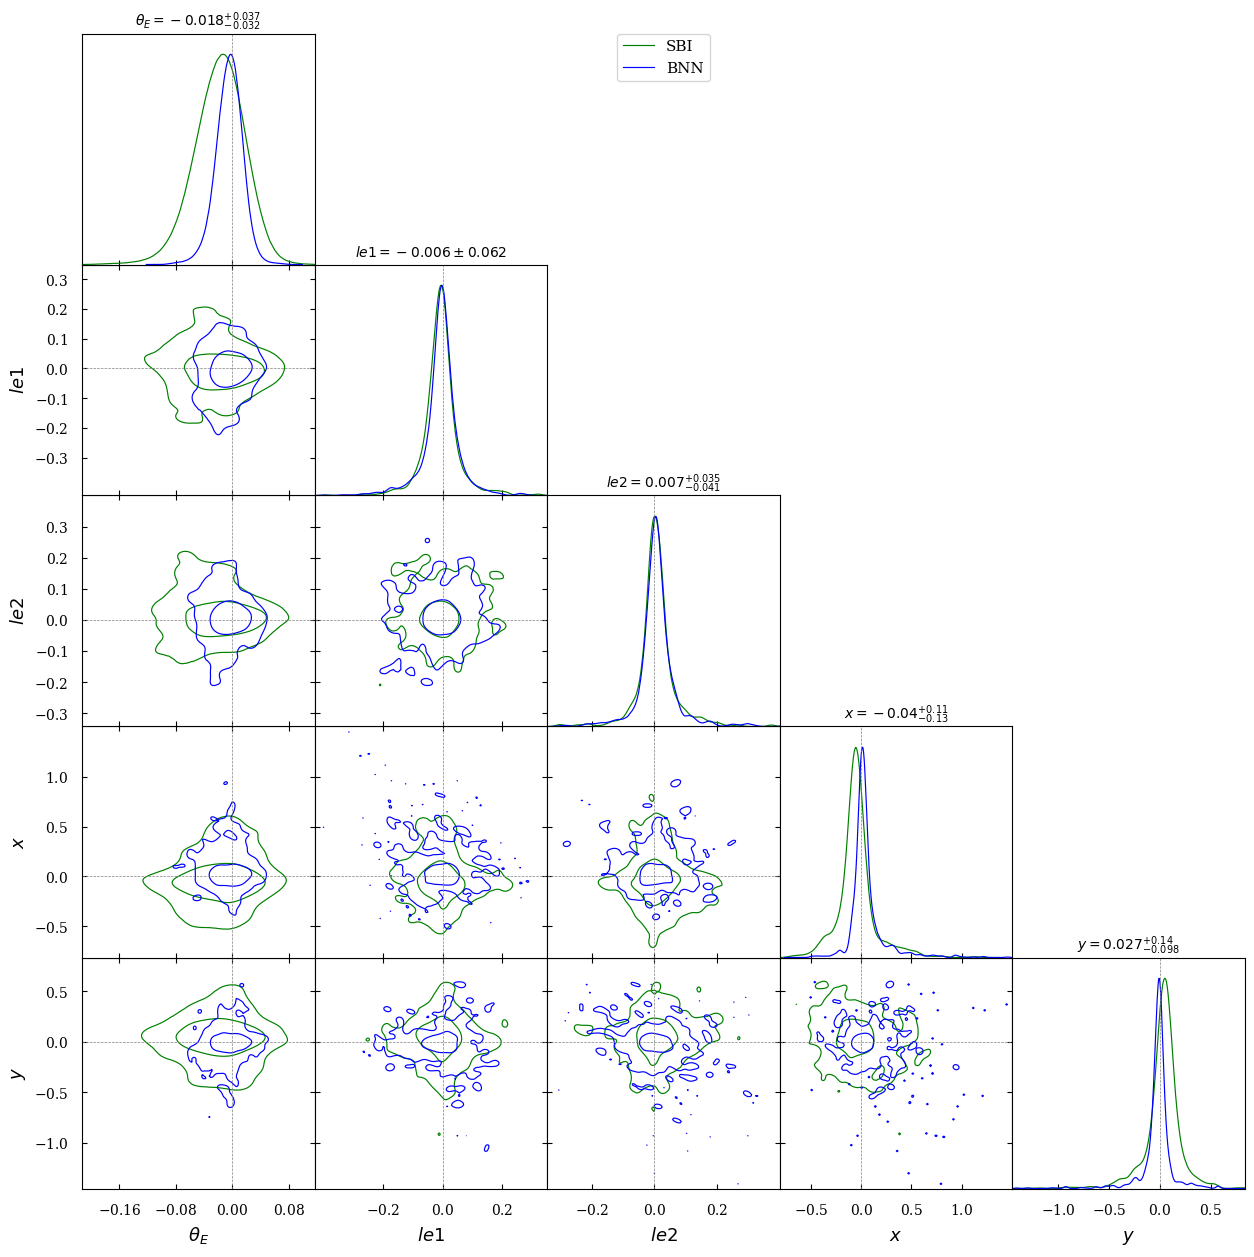

In [ ]:

test_number = 1000
prior_low = [0.3, -0.8, -0.8, -2, -2, -0.6, -0.6, 22, 0.1, 0.5, -0.8, -0.8]
prior_high = [4.0, 0.8, 0.8, 2, 2, 0.6, 0.6, 27, 3, 8, 0.8, 0.8]

prior_low = [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]
prior_high = [1,1,1,1,1,1,1,1,1,1,1,1]

limits = np.array([prior_low, prior_high]).T


# Now let's make a vector of the median (one definition of "best-fit") values of the posterior for each parameter
# best_fit = []
# for i in range(12):
#   best_fit.append(np.median(samples[:,i].cpu()))
# best_fit_t = torch.tensor(best_fit)


true_theta_E = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g'].to_numpy()[:test_number]
true_le1 = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-e1-g'].to_numpy()[:test_number]
true_le2 = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-e2-g'].to_numpy()[:test_number]
true_x = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-center_x-g'].to_numpy()[:test_number]
true_y = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-center_y-g'].to_numpy()[:test_number]

# true_g1 = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-SHEAR_PROFILE_1-gamma1-g'].to_numpy()[:test_number]
# true_g2 = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-SHEAR_PROFILE_1-gamma2-g'].to_numpy()[:test_number]

# true_smag = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g'].to_numpy()[:test_number]
# true_R = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-R_sersic-g'].to_numpy()[:test_number]
# true_n = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-n_sersic-g'].to_numpy()[:test_number]
# true_se1 = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-e1-g'].to_numpy()[:test_number]
# true_se2 = test_set.CONFIGURATION_1_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-e2-g'].to_numpy()[:test_number]

true_parameter = np.array([true_theta_E, true_le1, true_le2, true_x, true_y])

best_fit_t_diff = SBI_best_fit_arr[0,:test_number,:]-true_parameter.T
max_cut = SBI_max_like_arr[0,:test_number,:]-true_parameter.T
max_cut_ext = np.append(max_cut, SBI_max_like_arr[0,:test_number,:],axis=1)

error = SBI_percentile68u_arr[0,:test_number,:] - SBI_percentile68l_arr[0,:test_number,:]

max_cut_norm = max_cut/error
max_cut_ext_norm = np.append(max_cut_norm, SBI_max_like_arr[0,:test_number,:], axis=1)

pred_med_array = np.median(BNNsamples,axis=0)

BNN_diff = pred_med_array-true_parameter.T

BNN_diff_ext = np.append(BNN_diff, pred_med_array[:test_number,:], axis=1)

BNN_error = np.percentile(BNNsamples,84,axis=0) - np.percentile(BNNsamples,16,axis=0)

BNN_diff_norm = BNN_diff/BNN_error
BNN_diff_ext_norm = np.append(BNN_diff_norm, pred_med_array[:test_number,:], axis=1)

# map = []
# for j in range(len(SBI_map_array[0])):
#   map.append(SBI_map_array[0,j].numpy())

# map_diff = map-true_parameter.T

from getdist import plots, MCSamples
from getdist.styles.tab10 import style_name
plots.set_active_style(style_name)

SBIsamples_plot = MCSamples(samples=max_cut_ext,
                       names = [r'\theta_E','le1','le2','x','y',r'\theta_E_t','le1_t','le2_t','x_t','y_t'],
                       labels = [r'\theta_E','le1','le2','x','y',r'\theta_E_t','le1_t','le2_t','x_t','y_t'])

# SBIsamples_plot_norm = MCSamples(samples=max_cut_ext_norm,
#                             names = [r'\theta_E','le1','le2','x','y',r'\theta_E_t','le1_t','le2_t','x_t','y_t'],
#                       labels = [r'\theta_E','le1','le2','x','y',r'\theta_E_t','le1_t','le2_t','x_t','y_t'])

BNNsamples_plot = MCSamples(samples=BNN_diff_ext,names = [r'\theta_E','le1','le2','x','y',r'\theta_E_t','le1_t','le2_t','x_t','y_t'],
                       labels = [r'\theta_E','le1','le2','x','y',r'\theta_E_t','le1_t','le2_t','x_t','y_t'])

# BNNsamples_plot_norm = MCSamples(samples=BNN_diff_ext_norm,names = [r'\theta_E','le1','le2','x','y',r'\theta_E_t','le1_t','le2_t','x_t','y_t'],
#                        labels = [r'\theta_E','le1','le2','x','y',r'\theta_E_t','le1_t','le2_t','x_t','y_t'])

# 3D (scatter) triangle plot
g = plots.get_subplot_plotter(width_inch=15)
g.settings.scaling_factor = 2
g.triangle_plot([SBIsamples_plot,BNNsamples_plot],[r'\theta_E','le1','le2','x','y'], legend_labels=['SBI','BNN'],
                colors=['green','blue'],
                line_args=[{'color':'green'},{'color':'blue'}],
                markers={r'\theta_E':0,'le1':0,'le2':0,'x':0,'y':0},
                title_limit=1)

g = plots.get_subplot_plotter(width_inch=15)
g.settings.scaling_factor = 2
g.triangle_plot([BNNsamples_plot, SBIsamples_plot],[r'\theta_E','le1','le2','x','y'], legend_labels=['SBI','BNN'],
                colors=['green','blue'],
                line_args=[{'color':'green'},{'color':'blue'}],
                markers={r'\theta_E':0,'le1':0,'le2':0,'x':0,'y':0},
                title_limit=1)


# g = plots.get_subplot_plotter(width_inch=16)
# g.settings.scaling_factor = 1
# g.settings.tight_layout=True
# g.triangle_plot([SBIsamples_plot_norm,BNNsamples_plot_norm],[r'\theta_E','le1','1e2','x','y'], legend_labels=['SBI','BNN'],
#                 colors=['green','blue'],
#                 line_args=[{'color':'green'},{'color':'blue'}],
#                 markers={r'\theta_E':0,'le1':0,'1e2':0,'x':0,'y':0},
#                 title_limit=1)

# g = plots.get_subplot_plotter(width_inch=16)
# g.settings.scaling_factor = 1.5
# g.settings.tight_layout=True
# g.triangle_plot([BNNsamples_plot_norm,SBIsamples_plot_norm],[r'\theta_E','le1','1e2','x','y'], legend_labels=['BNN','SBI'],
#                 colors=['green','blue'],
#                 line_args=[{'color':'green'},{'color':'blue'}],
#                 markers={r'\theta_E':0,'le1':0,'1e2':0,'x':0,'y':0},
#                 title_limit=1)


# g.triangle_plot([BNNsamples],[r'\theta_E','le1','1e2','x','y','g1','g2','smag','R','n','se1','se2'], plot_3d_with_param=r'smag_t', legend_labels=['BNN'],
#                 markers={r'\theta_E':0,'le1':0,'1e2':0,'x':0,'y':0,'g1':0,'g2':0,'smag':0,'R':0,'n':0,'se1':0,'se2':0},
#                 title_limit=1)

# g = plots.get_subplot_plotter(width_inch=16)
# g.settings.scaling_factor = 1
# g.triangle_plot([SBIsamples_norm],[r'\theta_E','le1','1e2','x','y','g1','g2','smag','R','n','se1','se2'], plot_3d_with_param=r'smag_t', legend_labels=['SBI'],
#                 markers={r'\theta_E':0,'le1':0,'1e2':0,'x':0,'y':0,'g1':0,'g2':0,'smag':0,'R':0,'n':0,'se1':0,'se2':0},
#                 title_limit=1)

# g = plots.get_subplot_plotter()
# g.settings.scaling_factor = 0.2
# g.triangle_plot([SBIsamples_err], plot_3d_with_param=r'\theta_E', legend_labels=['SBI'],
#                 markers={r'\theta_E':0,'le1':0,'1e2':0,'x':0,'y':0,'g1':0,'g2':0,'smag':0,'R':0,'n':0,'se1':0,'se2':0},
#                 title_limit=1)

# c = cc.ChainConsumer()
# c.add_chain(max_cut, parameters=[r'$\theta_E$',r'$le1$',r'$1e2$',r'x',r'y',r'g1',r'g2',r'smag',r'R',r'n',r'se1',r'se2'], name = 'SBI')
# c.add_chain(BNN_diff, parameters=[r'$\theta_E$',r'$le1$',r'$1e2$',r'x',r'y',r'g1',r'g2',r'smag',r'R',r'n',r'se1',r'se2'], name= 'BNN')
# c.configure(cloud=True, sigmas=[0,1])
# fig = c.plotter.plot(truth=[0,0,0,0,0,0,0,0,0,0,0,0])

Now, let's plot some summary statistics for the entire test set.

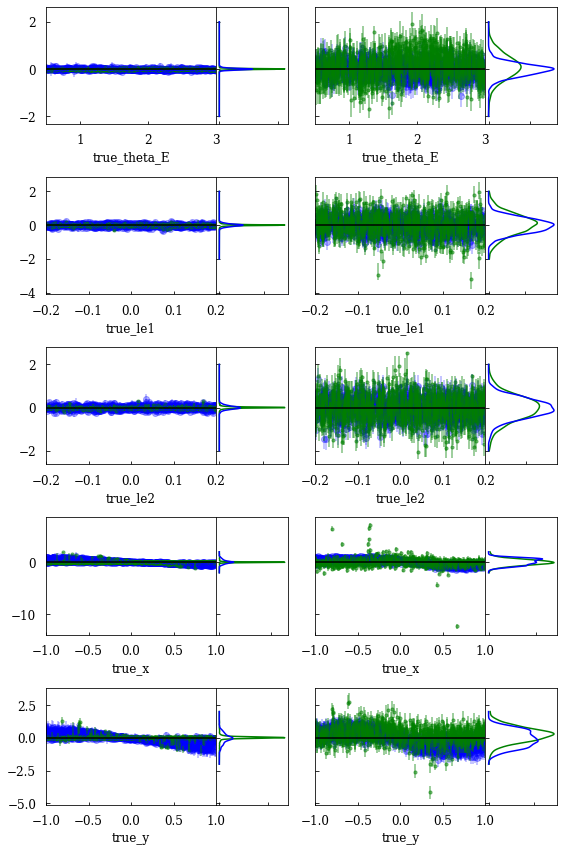

In [ ]:
_# fig, ax = plt.subplots(3,1,figsize=(20,15),sharex='all')

true_theta_E = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g'].to_numpy()
true_le1 = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-e1-g'].to_numpy()
true_le2 = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-e2-g'].to_numpy()
true_x = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-center_x-g'].to_numpy()
true_y = test_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-center_y-g'].to_numpy()


true_array = np.array([true_theta_E, true_le1, true_le2, true_x, true_y])
labels = ['true_theta_E', 'true_le1', 'true_le2', 'true_x', 'true_y']

prior_low = [0.3, -0.8, -0.8, -2, -2]
prior_high = [4.0, 0.8, 0.8, 2, 2]

prior_low = [0.5, -0.2, -0.2, -1, -1]
prior_high = [3.0, 0.2, 0.2, 1, 1]

limits = np.array([prior_low, prior_high]).T

BNN_pred_med_array = np.median(BNNsamples,axis=0)
BNN_yerr_l_bound = np.subtract(np.array(BNN_pred_med_array), np.percentile(BNNsamples,16,axis=0))
BNN_yerr_h_bound = np.subtract(np.percentile(BNNsamples,84,axis=0) , BNN_pred_med_array)
BNN_err = BNN_yerr_l_bound + BNN_yerr_h_bound


fig, ax = plt.subplots(len(true_array),2,figsize=(8,12),sharey='row')
for j in range(len(pos_list)):
  for i in range(len(true_array)):

    # SBI_max_like = SBI_max_like_arr[i]
    # SBI_yerr_l_bound = np.subtract(np.array(SBI_max_like),np.array(SBI_percentile68l_arr[i]))
    # SBI_yerr_h_bound = np.subtract(np.array(SBI_percentile68u_arr[i]), SBI_max_like)
    # SBI_err = SBI_yerr_l_bound + SBI_yerr_h_bound

    # BNNsamplescaled = []
    # for j in range(1000):
    #   BNNsamplescaled.append(scaler.inverse_transform(np.asarray(BNNsamples[:,j,:])))

    # BNN_pred_med_array = np.median(BNNsamples,axis=0)
    # BNN_yerr_l_bound = np.subtract(np.array(BNN_pred_med_array), np.percentile(BNNsamples,16,axis=0))
    # BNN_yerr_h_bound = np.subtract(np.percentile(BNNsamples,84,axis=0) , BNN_pred_med_array)
    # BNN_err = BNN_yerr_l_bound + BNN_yerr_h_bound

    # BNN_diff = pred_med_array-true_parameter.T

    # BNN_diff_ext = np.append(BNN_diff, pred_med_array[:test_number,:], axis=1)
    # BNN_error = np.percentile(BNNsamples,84,axis=0) - np.percentile(BNNsamples,16,axis=0)

    # BNN_diff_norm = BNN_diff/BNN_error
    # BNN_diff_ext_norm = np.append(BNN_diff_norm, pred_med_array[:test_number,:], axis=1)

    # ax[0].set_title("Theta_E")
    # ax[0].scatter(true_theta_E, SBI_max_like, c='r',alpha=0.3, label = 'SBI')
    # ax[0].errorbar(true_theta_E, SBI_max_like, yerr=[SBI_yerr_l_bound, SBI_yerr_h_bound], c='r', marker='s',alpha=0.3,fmt='none')
    # ax[0].scatter(true_theta_E, BNN_pred_med_array, c='b',alpha=0.3, label = 'BNN')
    # ax[0].errorbar(true_theta_E, BNN_pred_med_array, yerr=[BNN_yerr_l_bound, BNN_yerr_h_bound], c='b', marker='s',alpha=0.3,fmt='none')
    # # ax[0].scatter(true_theta_E, scaler.inverse_transform(np.asarray(BNN_pred_med_array)), c='b',alpha=0.3)
    # # ax[0].errorbar(true_theta_E, scaler.inverse_transform(np.asarray(BNN_pred_med_array)), yerr=[scaler.inverse_transform(np.asarray(BNN_yerr_l_bound)), scaler.inverse_transform(np.asarray(BNN_yerr_h_bound))], c='b', marker='s',alpha=0.3,fmt='none')

    # ax[0].plot([0,3.5], [0,3.5], c='k')
    # ax[0].set_xlim([0,3.5])
    # ax[0].set_ylim([0,3.5])
    # ax[0].set_xlabel('True Theta_E')
    # ax[0].set_ylabel('Predicted Theta_E')

    # ax[1].scatter(true_theta_E, np.ravel(SBI_max_like)-true_theta_E,c='r',alpha=0.5, label = 'SBI')
    # ax[1].errorbar(true_theta_E, np.ravel(SBI_max_like)-true_theta_E, yerr=[SBI_yerr_l_bound, SBI_yerr_h_bound], c='r', marker='s',fmt='none',alpha=0.5)
    # ax[1].scatter(true_theta_E, np.ravel(BNN_pred_med_array)-true_theta_E,c='b',alpha=0.5, label = 'BNN')
    # ax[1].errorbar(true_theta_E, np.ravel(BNN_pred_med_array)-true_theta_E, yerr=[BNN_yerr_l_bound, BNN_yerr_h_bound], c='b', marker='s',fmt='none',alpha=0.5)
    # ax[1].axhline(0,c='k')
    # ax[1].set_xlim([0,3.5])
    # ax[1].set_xlabel('True Theta_E')
    # ax[1].set_ylabel('Difference (Predicted-True)')

    # ax[2].scatter(true_theta_E, np.ravel(np.divide((np.ravel(SBI_max_like)-true_theta_E),np.ravel(SBI_err))), c='r',alpha=0.5, label = 'SBI')
    # ax[2].errorbar(true_theta_E, np.ravel(np.divide((np.ravel(SBI_max_like)-true_theta_E),np.ravel(SBI_err))), yerr=[SBI_yerr_l_bound/SBI_err, SBI_yerr_h_bound/SBI_err], c='r', marker='s',fmt='none',alpha=0.5)
    # ax[2].scatter(true_theta_E, np.ravel(np.divide((np.ravel(BNN_pred_med_array)-true_theta_E),np.ravel(BNN_err))),c='b',alpha=0.5, label = 'BNN')
    # ax[2].errorbar(true_theta_E, np.ravel(np.divide((np.ravel(BNN_pred_med_array)-true_theta_E),np.ravel(BNN_err))), yerr=[BNN_yerr_l_bound/BNN_err, BNN_yerr_h_bound/BNN_err], c='b', marker='s',fmt='none',alpha=0.5)
    # ax[2].axhline(0,c='k')
    # ax[2].set_xlim([0,3.5])
    # ax[2].set_xlabel('True Theta_E')
    # ax[2].set_ylabel('Normalized Difference (Predicted-True)/68% Uncertainty')


    SBI_yerr_l_bound_med = SBI_best_fit_arr[j,:,i] - SBI_percentile68l_arr[j,:,i]
    SBI_yerr_u_bound_med = SBI_percentile68u_arr[j,:,i] - SBI_best_fit_arr[j,:,i]
    SBI_yerr_l_bound_max = SBI_max_like_arr[j,:,i] - SBI_percentile68l_arr[j,:,i]
    SBI_yerr_u_bound_max = SBI_percentile68u_arr[j,:,i] - SBI_max_like_arr[j,:,i]

    SBI_err_med = SBI_yerr_l_bound_med + SBI_yerr_u_bound_med
    SBI_err_max = SBI_yerr_l_bound_max + SBI_yerr_u_bound_max

    # weird_index.append(np.where(np.logical_or(yerr_l_bound_max<0, yerr_u_bound_max<0)))
    # t = np.logical_or(yerr_l_bound_max<0, yerr_u_bound_max<0)
    # ax[i,0].scatter(true_array[i][t], true_array[i][t] - SBI_max_like_arr[j,:,i][t], s=10, alpha = 0.5)
    # ax[i,0].errorbar(true_array[i][t], true_array[i][t] - SBI_max_like_arr[j,:,i][t], yerr=[yerr_l_bound_max[t], yerr_u_bound_max[t]], alpha=0.5, marker='s',fmt='none')
    # ax[i,1].scatter(true_array[i][t], true_array[i][t] - SBI_best_fit_arr[j,:,i][t], s=10, alpha = 0.5)
    # ax[i,1].errorbar(true_array[i][t], true_array[i][t] - SBI_best_fit_arr[j,:,i][t], yerr=[yerr_l_bound_med[t], yerr_u_bound_med], alpha=0.5, marker='s',fmt='none')

    # ax[i,0].scatter(true_array[i], SBI_max_like_arr[j,:,i] - true_array[i], s=10, alpha = 0.5)
    # ax[i,0].errorbar(true_array[i], SBI_max_like_arr[j,:,i] - true_array[i], yerr=[yerr_l_bound_max, yerr_u_bound_max], alpha=0.5, marker='s',fmt='none')

    ax[i,0].scatter(true_array[i], BNN_pred_med_array.T[i] - true_array[i], c='b',alpha=0.3, label = 'BNN')
    ax[i,0].errorbar(true_array[i], BNN_pred_med_array.T[i] - true_array[i], yerr=[BNN_yerr_l_bound.T[i], BNN_yerr_h_bound.T[i]],c='b', marker='s',alpha=0.3,fmt='none')
    ax[i,1].scatter(true_array[i], np.divide(BNN_pred_med_array.T[i] - true_array[i], BNN_err.T[i]), c='b', alpha=0.3, label = 'BNN')
    ax[i,1].errorbar(true_array[i], np.divide(BNN_pred_med_array.T[i] - true_array[i], BNN_err.T[i]), yerr=[np.ravel(BNN_yerr_l_bound.T[i]/BNN_err.T[i]), np.ravel(BNN_yerr_h_bound.T[i]/BNN_err.T[i])], c='b', marker='s',alpha=0.3,fmt='none')

    ax[i,0].scatter(true_array[i], SBI_max_like_arr[j,:,i] - true_array[i], s=10, c='g', alpha = 0.5)
    ax[i,0].errorbar(true_array[i], SBI_max_like_arr[j,:,i] - true_array[i], yerr=[SBI_yerr_l_bound_max, SBI_yerr_u_bound_max], c='g', alpha=0.5, marker='s',fmt='none')
    ax[i,1].scatter(true_array[i], np.divide(SBI_best_fit_arr[j,:,i] - true_array[i], SBI_err_max), c='g', s=10, alpha = 0.5)
    ax[i,1].errorbar(true_array[i], np.divide(SBI_best_fit_arr[j,:,i] - true_array[i], SBI_err_max), yerr=[np.ravel(np.divide(SBI_yerr_l_bound_max, SBI_err_max)), np.ravel(np.divide(SBI_yerr_u_bound_max,SBI_err_max))], c='g', alpha=0.5, marker='s',fmt='none')

    ax[i,0].axhline(0,c='k')
    ax[i,0].set_xlim(limits[i])
    ax[i,0].set_xlabel(labels[i])
    ax[i,1].axhline(0,c='k')
    ax[i,1].set_xlim(limits[i])
    ax[i,1].set_xlabel(labels[i])

    # ylinfit = stats.linregress(true_array[i], SBI_max_like_arr[j,:,i]-true_array[i])
    # xlin = np.linspace(prior_low[i], prior_high[i], 100)
    # ylin = xlin*ylinfit[0] + ylinfit[1]
    # ax[i,0].plot(xlin, ylin, label = "%.3f"%(ylinfit[0]))
    # ax[i,0].legend()

    divider = make_axes_locatable(ax[i,0])
    # axHistx = divider.append_axes("top", 0.3, pad=0, sharex=ax[i,0])
    axHisty = divider.append_axes("right", 1.0, pad=0, sharey=ax[i,0])
    plt.setp(
        axHisty.get_yticklabels()
        + axHisty.get_xticklabels(),
        visible=False,
    )

    ylim_min = -2
    ylim_max = 2
    # ylim_min = np.amin(SBI_max_like_arr[j,:,i]-true_array[i])
    # ylim_max = np.amax(SBI_max_like_arr[j,:,i]-true_array[i])
    kde_y1 = stats.gaussian_kde(SBI_max_like_arr[j,:,i]-true_array[i])
    kde_y2 = stats.gaussian_kde(SBI_max_like_arr[j,:,i]-true_array[i], bw_method="silverman")
    y_eval = np.linspace(ylim_min, ylim_max, num=200)
    axHisty.plot(kde_y1(y_eval), y_eval, "g-", label="Scott's Rule")

    kde_y1 = stats.gaussian_kde(BNN_pred_med_array.T[i] - true_array[i])
    kde_y2 = stats.gaussian_kde(BNN_pred_med_array.T[i] - true_array[i], bw_method="silverman")
    y_eval = np.linspace(ylim_min, ylim_max, num=200)
    axHisty.plot(kde_y1(y_eval), y_eval, "b-", label="Scott's Rule")

    divider = make_axes_locatable(ax[i,1])
    # axHistx = divider.append_axes("top", 0.3, pad=0, sharex=ax[i,0])
    axHisty = divider.append_axes("right", 1.0, pad=0, sharey=ax[i,0])
    plt.setp(
        axHisty.get_yticklabels()
        + axHisty.get_xticklabels(),
        visible=False,
    )

    ylim_min = -2
    ylim_max = 2
    # ylim_min = np.amin(SBI_max_like_arr[j,:,i]-true_array[i])
    # ylim_max = np.amax(SBI_max_like_arr[j,:,i]-true_array[i])
    kde_y1 = stats.gaussian_kde(np.divide(SBI_best_fit_arr[j,:,i] - true_array[i], SBI_err_max))
    kde_y2 = stats.gaussian_kde(np.divide(SBI_best_fit_arr[j,:,i] - true_array[i], SBI_err_max), bw_method="silverman")
    y_eval = np.linspace(ylim_min, ylim_max, num=200)
    axHisty.plot(kde_y1(y_eval), y_eval, "g-", label="Scott's Rule")

    kde_y1 = stats.gaussian_kde(np.divide(BNN_pred_med_array.T[i] - true_array[i], BNN_err.T[i]))
    kde_y2 = stats.gaussian_kde(np.divide(BNN_pred_med_array.T[i] - true_array[i], BNN_err.T[i]), bw_method="silverman")
    y_eval = np.linspace(ylim_min, ylim_max, num=200)
    axHisty.plot(kde_y1(y_eval), y_eval, "b-", label="Scott's Rule")

    # ylinfit = stats.linregress(true_array[i],SBI_best_fit_arr[j,:,i]-true_array[i])
    # xlin = np.linspace(prior_low[i], prior_high[i], 100)
    # ylin = xlin*ylinfit[0] + ylinfit[1]
    # ax[i,1].plot(xlin, ylin, label = "%.3f"%(ylinfit[0]))
    # ax[i,1].legend()


    # divider = make_axes_locatable(ax[i])
    # # axHistx = divider.append_axes("top", 0.3, pad=0, sharex=ax[i,0])
    # axHisty = divider.append_axes("right", 0.6, pad=0, sharey=ax[i])
    # plt.setp(
    #     axHisty.get_yticklabels()
    #     + axHisty.get_xticklabels(),
    #     visible=False,
    # )

    # ylim_min = np.amin(SBI_best_fit_arr[j,:,i]-true_array[i])
    # ylim_max = np.amax(SBI_best_fit_arr[j,:,i]-true_array[i])
    # kde_y1 = stats.gaussian_kde(SBI_best_fit_arr[j,:,i]-true_array[i])
    # kde_y2 = stats.gaussian_kde(SBI_best_fit_arr[j,:,i]-true_array[i], bw_method="silverman")
    # y_eval = np.linspace(ylim_min, ylim_max, num=200)
    # axHisty.plot(kde_y1(y_eval), y_eval, "k-", label="Scott's Rule")

plt.tight_layout()



# SBI_sample_array, SBI_logp_array, SBI_map_array, SBI_best_fit_arr, SBI_max_like_arr, SBI_percentile68u_arr, SBI_percentile68l_arr, SBI_percentile95u_arr,SBI_percentile95l_arr
# BNNsamples

# for i in range(1):
#   SBI_max_like = SBI_max_like_arr[i]
#   SBI_yerr_l_bound = np.subtract(np.array(SBI_max_like),np.array(SBI_percentile68l_arr[i]))
#   SBI_yerr_h_bound = np.subtract(np.array(SBI_percentile68u_arr[i]), SBI_max_like)
#   SBI_err = SBI_yerr_l_bound + SBI_yerr_h_bound

#   # BNNsamplescaled = []
#   # for j in range(1000):
#   #   BNNsamplescaled.append(scaler.inverse_transform(np.asarray(BNNsamples[:,j,:])))

#   BNN_pred_med_array = np.median(BNNsamples,axis=0)
#   BNN_yerr_l_bound = np.subtract(np.array(BNN_pred_med_array), np.percentile(BNNsamples,16,axis=0))
#   BNN_yerr_h_bound = np.subtract(np.percentile(BNNsamples,84,axis=0) , BNN_pred_med_array)
#   BNN_err = BNN_yerr_l_bound + BNN_yerr_h_bound
#   # BNN_diff = pred_med_array-true_parameter.T

#   # BNN_diff_ext = np.append(BNN_diff, pred_med_array[:test_number,:], axis=1)
#   # BNN_error = np.percentile(BNNsamples,84,axis=0) - np.percentile(BNNsamples,16,axis=0)

#   # BNN_diff_norm = BNN_diff/BNN_error
#   # BNN_diff_ext_norm = np.append(BNN_diff_norm, pred_med_array[:test_number,:], axis=1)

#   ax[0].set_title("Theta_E")
#   ax[0].scatter(true_theta_E, SBI_max_like, c='r',alpha=0.3, label = 'SBI')
#   ax[0].errorbar(true_theta_E, SBI_max_like, yerr=[SBI_yerr_l_bound, SBI_yerr_h_bound], c='r', marker='s',alpha=0.3,fmt='none')
#   ax[0].scatter(true_theta_E, BNN_pred_med_array, c='b',alpha=0.3, label = 'BNN')
#   ax[0].errorbar(true_theta_E, BNN_pred_med_array, yerr=[BNN_yerr_l_bound, BNN_yerr_h_bound], c='b', marker='s',alpha=0.3,fmt='none')
#   # ax[0].scatter(true_theta_E, scaler.inverse_transform(np.asarray(BNN_pred_med_array)), c='b',alpha=0.3)
#   # ax[0].errorbar(true_theta_E, scaler.inverse_transform(np.asarray(BNN_pred_med_array)), yerr=[scaler.inverse_transform(np.asarray(BNN_yerr_l_bound)), scaler.inverse_transform(np.asarray(BNN_yerr_h_bound))], c='b', marker='s',alpha=0.3,fmt='none')

#   ax[0].plot([0,3.5], [0,3.5], c='k')
#   ax[0].set_xlim([0,3.5])
#   ax[0].set_ylim([0,3.5])
#   ax[0].set_xlabel('True Theta_E')
#   ax[0].set_ylabel('Predicted Theta_E')

#   ax[1].scatter(true_theta_E, np.ravel(SBI_max_like)-true_theta_E,c='r',alpha=0.5, label = 'SBI')
#   ax[1].errorbar(true_theta_E, np.ravel(SBI_max_like)-true_theta_E, yerr=[SBI_yerr_l_bound, SBI_yerr_h_bound], c='r', marker='s',fmt='none',alpha=0.5)
#   ax[1].scatter(true_theta_E, np.ravel(BNN_pred_med_array)-true_theta_E,c='b',alpha=0.5, label = 'BNN')
#   ax[1].errorbar(true_theta_E, np.ravel(BNN_pred_med_array)-true_theta_E, yerr=[BNN_yerr_l_bound, BNN_yerr_h_bound], c='b', marker='s',fmt='none',alpha=0.5)
#   ax[1].axhline(0,c='k')
#   ax[1].set_xlim([0,3.5])
#   ax[1].set_xlabel('True Theta_E')
#   ax[1].set_ylabel('Difference (Predicted-True)')

#   ax[2].scatter(true_theta_E, np.ravel(np.divide((np.ravel(SBI_max_like)-true_theta_E),np.ravel(SBI_err))), c='r',alpha=0.5, label = 'SBI')
#   ax[2].errorbar(true_theta_E, np.ravel(np.divide((np.ravel(SBI_max_like)-true_theta_E),np.ravel(SBI_err))), yerr=[SBI_yerr_l_bound/SBI_err, SBI_yerr_h_bound/SBI_err], c='r', marker='s',fmt='none',alpha=0.5)
#   ax[2].scatter(true_theta_E, np.ravel(np.divide((np.ravel(BNN_pred_med_array)-true_theta_E),np.ravel(BNN_err))),c='b',alpha=0.5, label = 'BNN')
#   ax[2].errorbar(true_theta_E, np.ravel(np.divide((np.ravel(BNN_pred_med_array)-true_theta_E),np.ravel(BNN_err))), yerr=[BNN_yerr_l_bound/BNN_err, BNN_yerr_h_bound/BNN_err], c='b', marker='s',fmt='none',alpha=0.5)
#   ax[2].axhline(0,c='k')
#   ax[2].set_xlim([0,3.5])
#   ax[2].set_xlabel('True Theta_E')
#   ax[2].set_ylabel('Normalized Difference (Predicted-True)/68% Uncertainty')

#   divider = make_axes_locatable(ax[1])
#   # axHistx = divider.append_axes("top", 0.3, pad=0, sharex=ax[i,0])
#   axHisty = divider.append_axes("right", 1, pad=0, sharey=ax[2])
#   plt.setp(
#       axHisty.get_yticklabels()
#       + axHisty.get_xticklabels(),
#       visible=False,
#   )

#   ylim_min = -2
#   ylim_max = 2
#   kde_y1 = stats.gaussian_kde(np.ravel(SBI_max_like)-true_theta_E)
#   kde_y2 = stats.gaussian_kde(np.ravel(SBI_max_like)-true_theta_E, bw_method="silverman")
#   y_eval = np.linspace(ylim_min, ylim_max, num=200)
#   axHisty.plot(kde_y1(y_eval), y_eval, "r-", label="Scott's Rule")
#   axHisty.plot(kde_y2(y_eval), y_eval, "r-", label="Silverman's's Rule")
#   kde_y1 = stats.gaussian_kde(np.ravel(BNN_pred_med_array)-true_theta_E)
#   kde_y2 = stats.gaussian_kde(np.ravel(BNN_pred_med_array)-true_theta_E, bw_method="silverman")
#   y_eval = np.linspace(ylim_min, ylim_max, num=200)
#   axHisty.plot(kde_y1(y_eval), y_eval, "b-", label="Scott's Rule")
#   axHisty.plot(kde_y2(y_eval), y_eval, "b-", label="Silverman's's Rule")


#   divider = make_axes_locatable(ax[2])
#   # axHistx = divider.append_axes("top", 0.3, pad=0, sharex=ax[i,0])
#   axHisty = divider.append_axes("right", 1, pad=0, sharey=ax[2])
#   plt.setp(
#       axHisty.get_yticklabels()
#       + axHisty.get_xticklabels(),
#       visible=False,
#   )

#   ylim_min = -2
#   ylim_max = 2
#   kde_y1 = stats.gaussian_kde(np.ravel(np.divide((np.ravel(SBI_max_like)-true_theta_E),np.ravel(SBI_err))))
#   kde_y2 = stats.gaussian_kde(np.ravel(np.divide((np.ravel(SBI_max_like)-true_theta_E),np.ravel(SBI_err))), bw_method="silverman")
#   y_eval = np.linspace(ylim_min, ylim_max, num=200)
#   axHisty.plot(kde_y1(y_eval), y_eval, "r-", label="Scott's Rule")
#   axHisty.plot(kde_y2(y_eval), y_eval, "r-", label="Silverman's's Rule")
#   kde_y1 = stats.gaussian_kde(np.ravel(np.divide((np.ravel(BNN_pred_med_array)-true_theta_E),np.ravel(BNN_err))))
#   kde_y2 = stats.gaussian_kde(np.ravel(np.divide((np.ravel(BNN_pred_med_array)-true_theta_E),np.ravel(BNN_err))), bw_method="silverman")
#   y_eval = np.linspace(ylim_min, ylim_max, num=200)
#   axHisty.plot(kde_y1(y_eval), y_eval, "b-", label="Scott's Rule")
#   axHisty.plot(kde_y2(y_eval), y_eval, "b-", label="Silverman's's Rule")

#   ax[0].legend()
#   ax[1].legend()
#   ax[2].legend()

#   # ylinfit = stats.linregress(true_theta_E,np.ravel(SBI_max_like)-true_theta_E[i])
#   # xlin = np.linspace(prior_low[i], prior_high[i], 100)
#   # ylin = xlin*ylinfit[0] + ylinfit[1]
#   # ax[2].plot(xlin, ylin, label = "%.3f"%(ylinfit[0]))
#   # ax[2].legend()
#   SBI_chi = np.ravel(np.divide((np.ravel(SBI_max_like)-true_theta_E),np.ravel(SBI_err)))
#   BNN_chi = np.divide((np.ravel(BNN_pred_med_array)-true_theta_E),np.ravel(BNN_err))
#   print(np.median(SBI_chi), np.median(BNN_chi), np.std(SBI_chi), np.std(BNN_chi))


# SBI Diagnostics - we use SBC to check that our SBI model is unbiased.

First, we generate the training set we train our SBI on.

In [ ]:
config_file = '../SBI_WG/5param_model_training.yaml'
normalization_set = dl.make_dataset(config_file)



In [ ]:
file_name = "normalization_set.pkl"
open_file = open(file_name, "rb")
normalization_set = pickle.load(open_file)
open_file.close()

EOFError: ignored

Now, we run SBC (some functions courtesy of Gourav Khullar)

Running 1000 sbc samples.:   0%|          | 0/1000 [00:00<?, ?it/s]

kolmogorov-smirnov p-values 
check_stats['ks_pvals'] = [2.2129588e-01 9.6324350e-15 2.3344528e-02 2.5202939e-01 7.0943552e-06]
c2st accuracies 
check_stats['c2st_ranks'] = [0.583  0.6115 0.583  0.6105 0.5905]
- c2st accuracies check_stats['c2st_dap'] = [0.533  0.5335 0.512  0.4785 0.516 ]


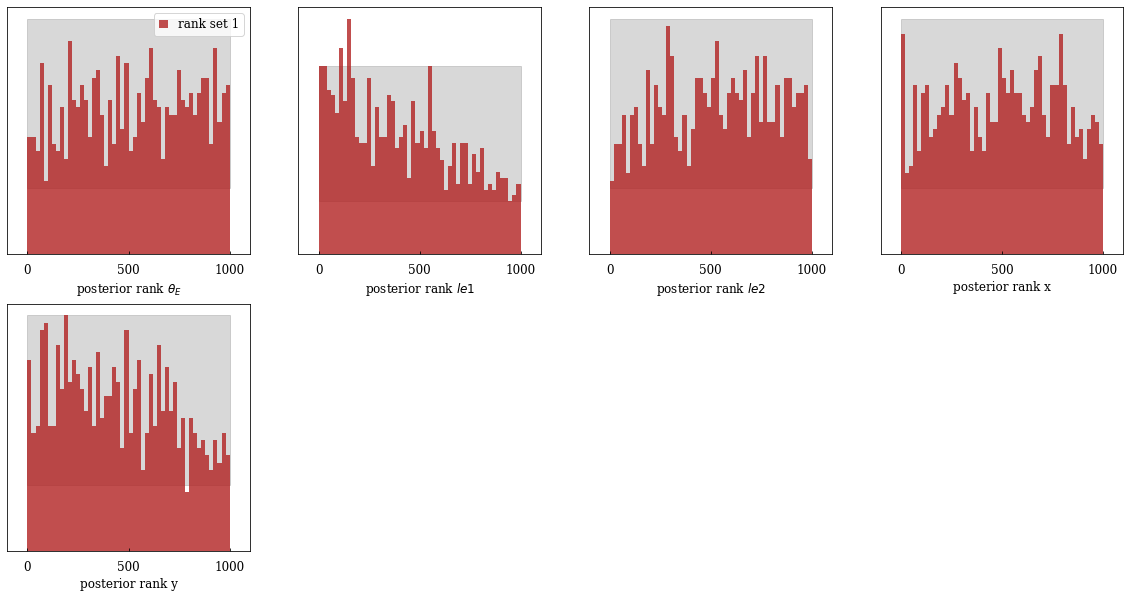

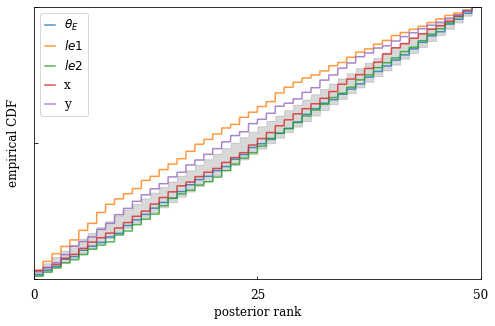

In [ ]:
from typing import Any, Dict, List, Optional, Tuple, Union
from torch import Tensor
from scipy.stats import binom, gaussian_kde
from matplotlib.pyplot import *

from sbi.analysis import eval_conditional_density
import collections
try:
    collectionsAbc = collections.abc  # type: ignore
except:
    collectionsAbc = collections


def sbc_rank_plot_dim1(
    ranks: Union[Tensor, np.ndarray, List[Tensor], List[np.ndarray]],
    num_posterior_samples: int,
    num_bins: Optional[int] = None,
    plot_type: str = "cdf",
    parameter_labels: Optional[List[str]] = None,
    ranks_labels: Optional[List[str]] = None,
    colors: Optional[List[str]] = None,
    kwargs: Dict = {},
) -> Tuple[Figure, Axes]:

    return _sbc_rank_plot(
        ranks,
        num_posterior_samples,
        num_bins,
        plot_type,
        parameter_labels,
        ranks_labels,
        colors,
        **kwargs,
    )


def _plot_ranks_as_hist(
    ranks: np.ndarray,
    num_bins: int,
    num_posterior_samples: int,
    ranks_label: Optional[str] = None,
    xlabel: Optional[str] = None,
    color: str = "firebrick",
    alpha: float = 0.8,
    show_ylabel: bool = False,
    show_legend: bool = False,
    num_ticks: int = 3,
    xlim_offset_factor: float = 0.1,
    legend_kwargs: dict = {},
) -> None:
    """Plot ranks as histograms on the current axis.
    Args:
        ranks: SBC ranks in shape (num_sbc_runs, )
        num_bins: number of bins for the histogram, recommendation is num_sbc_runs / 20.
        num_posteriors_samples: number of posterior samples used for ranking.
        ranks_label: label for the ranks, e.g., when comparing ranks of different
            methods.
        xlabel: label for the current parameter.
        color: histogram color, default from Talts et al.
        alpha: histogram transparency.
        show_ylabel: whether to show y-label "counts".
        show_legend: whether to show the legend, e.g., when comparing multiple ranks.
        num_ticks: number of ticks on the x-axis.
        xlim_offset_factor: factor for empty space left and right of the histogram.
        legend_kwargs: kwargs for the legend.
    """
    xlim_offset = int(num_posterior_samples * xlim_offset_factor)
    plt.hist(
        ranks,
        bins=num_bins,
        label=ranks_label,
        color=color,
        alpha=alpha,
    )

    if show_ylabel:
        plt.ylabel("counts")
    else:
        plt.yticks([])
    if show_legend and ranks_label:
        plt.legend(loc=1, handlelength=0.8, **legend_kwargs)

    plt.xlim(-xlim_offset, num_posterior_samples + xlim_offset)
    plt.xticks(np.linspace(0, num_posterior_samples, num_ticks))
    plt.xlabel("posterior rank" if xlabel is None else xlabel)

def _plot_hist_region_expected_under_uniformity(
    num_sbc_runs: int,
    num_bins: int,
    num_posterior_samples: int,
    alpha: float = 0.2,
    color: str = "grey",
) -> None:
    """Plot region of empirical cdfs expected under uniformity."""

    lower = binom(num_sbc_runs, p=1 / (num_bins + 1)).ppf(0.005)
    upper = binom(num_sbc_runs, p=1 / (num_bins + 1)).ppf(0.995)

    # Plot grey area with expected ECDF.
    plt.fill_between(
        x=np.linspace(0, num_posterior_samples, num_bins),
        y1=np.repeat(lower, num_bins),
        y2=np.repeat(upper, num_bins),
        color=color,
        alpha=alpha,
    )


def _sbc_rank_plot(
    ranks: Union[Tensor, np.ndarray, List[Tensor], List[np.ndarray]],
    num_posterior_samples: int,
    num_bins: Optional[int] = None,
    plot_type: str = "cdf",
    parameter_labels: Optional[List[str]] = None,
    ranks_labels: Optional[List[str]] = None,
    colors: Optional[List[str]] = None,
    num_repeats: int = 50,
    line_alpha: float = 0.8,
    show_uniform_region: bool = True,
    uniform_region_alpha: float = 0.3,
    xlim_offset_factor: float = 0.1,
    num_cols: int = 4,
    params_in_subplots: bool = False,
    show_ylabel: bool = False,
    sharey: bool = False,
    fig: Optional[Figure] = None,
    ax: Optional[Axes] = None,
    figsize: Optional[tuple] = None,
) -> Tuple[Figure, Axes]:


    if isinstance(ranks, (Tensor, np.ndarray)):
        ranks_list = [ranks]
    else:
        assert isinstance(ranks, List)
        ranks_list = ranks
    for idx, rank in enumerate(ranks_list):
        assert isinstance(rank, (Tensor, np.ndarray))
        if isinstance(rank, Tensor):
            ranks_list[idx] = rank.numpy()

    plot_types = ["hist", "cdf"]
    assert (
        plot_type in plot_types
    ), "plot type {plot_type} not implemented, use one in {plot_types}."

    num_sbc_runs, num_parameters = ranks_list[0].shape
    num_ranks = len(ranks_list)

    # For multiple methods, and for the hist plots plot each param in a separate subplot
    if num_ranks > 1 or plot_type == "hist":
        params_in_subplots = True

    for ranki in ranks_list:
        assert (
            ranki.shape == ranks_list[0].shape
        ), "all ranks in list must have the same shape."

    num_rows = int(np.ceil(num_parameters / num_cols))
    if figsize is None:
        figsize = (num_parameters * 4, num_rows * 5) if params_in_subplots else (8, 5)

    if parameter_labels is None:
        parameter_labels = [f"dim {i+1}" for i in range(num_parameters)]
    if ranks_labels is None:
        ranks_labels = [f"rank set {i+1}" for i in range(num_ranks)]
    if num_bins is None:
        # Recommendation from Talts et al.
        num_bins = num_sbc_runs // 20

    # Plot one row subplot for each parameter, different "methods" on top of each other.
    if params_in_subplots:
        if fig is None or ax is None:
            fig, ax = plt.subplots(
                num_rows, min(num_parameters, num_cols), figsize=figsize, sharey=sharey
            )
        else:
            assert (
                ax.size >= num_parameters
            ), "There must be at least as many subplots as parameters."
            if ax.ndim > 1:
                num_rows = ax.shape[0]
            else:
                num_rows = 1
        assert ax is not None

        col_idx, row_idx = 0, 0
        for ii, ranki in enumerate(ranks_list):
            for jj in range(num_parameters):
                col_idx = jj if num_rows == 1 else jj % num_cols
                print(col_idx)
                row_idx = jj // num_cols
                plt.sca(ax)
                #plt.sca(ax[col_idx] if num_rows == 1 else ax[row_idx, col_idx])

                if plot_type == "hist":
                    _plot_ranks_as_hist(
                        ranki[:, jj],  # type: ignore
                        num_bins,
                        num_posterior_samples,
                        ranks_label=ranks_labels[ii],
                        color="firebrick" if colors is None else colors[ii],
                        xlabel=f"posterior rank {parameter_labels[jj]}",
                        show_ylabel=show_ylabel,
                        show_legend=jj == 0,
                        alpha=line_alpha,
                        xlim_offset_factor=xlim_offset_factor,
                    )
                    _plot_hist_region_expected_under_uniformity(
                        num_sbc_runs,
                        num_bins,
                        num_posterior_samples,
                        alpha=uniform_region_alpha,
                    )
                else:
                    raise ValueError(
                        f"plot_type {plot_type} not defined, use one in {plot_types}"
                    )
        col_idx += 1
        while num_rows > 1 and col_idx < num_cols:
            ax[row_idx, col_idx].axis("off")
            col_idx += 1

    # When there is only one set of ranks show all params in a single subplot.
    else:
        if fig is None or ax is None:
            fig, ax = plt.subplots(1, 1, figsize=figsize)

        plt.sca(ax)
        ranki = ranks_list[0]

        if show_uniform_region:
            _plot_cdf_region_expected_under_uniformity(
                num_sbc_runs, num_bins, num_repeats, alpha=uniform_region_alpha
            )

    return fig, ax

##################################################################################################################
#Simulation-Based Calibration
from torch import eye, ones, zeros
from torch.distributions import MultivariateNormal

from sbi.analysis import check_sbc,run_sbc, get_nltp, sbc_rank_plot
from sbi.inference import SNPE, SNPE_C, prepare_for_sbi, simulate_for_sbi
from sbi.simulators import linear_gaussian, diagonal_linear_gaussian

num_sbc_runs = 1000 # choose a number of sbc runs, should be ~100s or ideally 1000
# generate ground truth parameters and corresponding simulated observations for SBC.
num_posterior_samples = 10000


true_theta_E = normalization_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g'][:num_sbc_runs]
true_le1 = normalization_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-e1-g'][:num_sbc_runs]
true_le2 = normalization_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-e2-g'][:num_sbc_runs]
true_x = normalization_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-center_x-g'][:num_sbc_runs]
true_y = normalization_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-center_y-g'][:num_sbc_runs]

thetas = torch.tensor(np.array([true_theta_E,true_le1,true_le2,true_x,true_y]).T,dtype=torch.float32).to('cuda:0')
xs = torch.tensor(normalization_set.CONFIGURATION_1_images[:num_sbc_runs,0].reshape(num_sbc_runs,1,1024), dtype=torch.float32).to('cuda:0')
posterior = pos_list[0]

# thetas = prior.sample((num_sbc_runs,))
# xs = simulator(thetas)

# run SBC: for each inference we draw 1000 posterior samples.
num_posterior_samples = 1000

ranks, dap_samples = run_sbc(thetas, xs, posterior, num_posterior_samples=num_posterior_samples)
check_stats = check_sbc(ranks.cpu(), thetas.cpu(), dap_samples.cpu(), num_posterior_samples=num_posterior_samples)

print(f"kolmogorov-smirnov p-values \ncheck_stats['ks_pvals'] = {check_stats['ks_pvals'].cpu().numpy()}")
print(f"c2st accuracies \ncheck_stats['c2st_ranks'] = {check_stats['c2st_ranks'].cpu().numpy()}")
print(f"- c2st accuracies check_stats['c2st_dap'] = {check_stats['c2st_dap'].cpu().numpy()}")

f,ax=sbc_rank_plot(ranks=ranks.cpu(),num_posterior_samples=num_posterior_samples,
             plot_type="hist", parameter_labels=[r'$\theta_E$',r'$le1$',r'$le2$',r'x',r'y'],
             num_bins=None)

# f,ax=sbc_rank_plot_dim1(ranks=ranks.cpu(),
#                    num_posterior_samples=num_posterior_samples,
#                    plot_type="hist",
#                    num_bins=None,
#                        )

f, ax = sbc_rank_plot(ranks.cpu(), num_sbc_runs,parameter_labels=[r'$\theta_E$',r'$le1$',r'$le2$',r'x',r'y'], plot_type = "cdf")

Running 1000 sbc samples.:   0%|          | 0/1000 [00:00<?, ?it/s]

kolmogorov-smirnov p-values 
check_stats['ks_pvals'] = [2.2129539e-01 1.2099531e-13 2.3344547e-02 2.8580514e-01 3.7295149e-06]
c2st accuracies 
check_stats['c2st_ranks'] = [0.572  0.5825 0.5975 0.585  0.589 ]
- c2st accuracies check_stats['c2st_dap'] = [0.4945 0.522  0.5205 0.465  0.499 ]


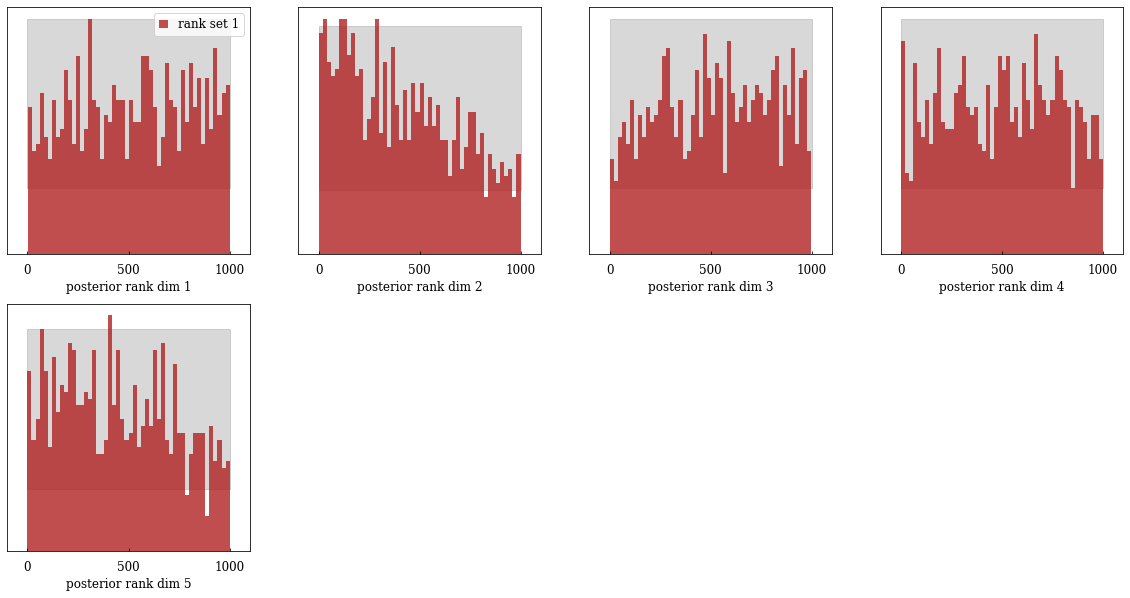

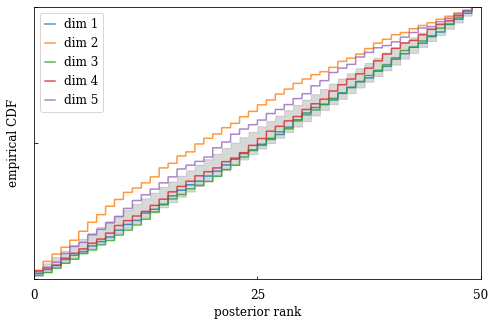

In [ ]:
from typing import Any, Dict, List, Optional, Tuple, Union
from torch import Tensor
from scipy.stats import binom, gaussian_kde
from matplotlib.pyplot import *

from sbi.analysis import eval_conditional_density
import collections
try:
    collectionsAbc = collections.abc  # type: ignore
except:
    collectionsAbc = collections


def sbc_rank_plot_dim1(
    ranks: Union[Tensor, np.ndarray, List[Tensor], List[np.ndarray]],
    num_posterior_samples: int,
    num_bins: Optional[int] = None,
    plot_type: str = "cdf",
    parameter_labels: Optional[List[str]] = None,
    ranks_labels: Optional[List[str]] = None,
    colors: Optional[List[str]] = None,
    kwargs: Dict = {},
) -> Tuple[Figure, Axes]:

    return _sbc_rank_plot(
        ranks,
        num_posterior_samples,
        num_bins,
        plot_type,
        parameter_labels,
        ranks_labels,
        colors,
        **kwargs,
    )


def _plot_ranks_as_hist(
    ranks: np.ndarray,
    num_bins: int,
    num_posterior_samples: int,
    ranks_label: Optional[str] = None,
    xlabel: Optional[str] = None,
    color: str = "firebrick",
    alpha: float = 0.8,
    show_ylabel: bool = False,
    show_legend: bool = False,
    num_ticks: int = 3,
    xlim_offset_factor: float = 0.1,
    legend_kwargs: dict = {},
) -> None:
    """Plot ranks as histograms on the current axis.
    Args:
        ranks: SBC ranks in shape (num_sbc_runs, )
        num_bins: number of bins for the histogram, recommendation is num_sbc_runs / 20.
        num_posteriors_samples: number of posterior samples used for ranking.
        ranks_label: label for the ranks, e.g., when comparing ranks of different
            methods.
        xlabel: label for the current parameter.
        color: histogram color, default from Talts et al.
        alpha: histogram transparency.
        show_ylabel: whether to show y-label "counts".
        show_legend: whether to show the legend, e.g., when comparing multiple ranks.
        num_ticks: number of ticks on the x-axis.
        xlim_offset_factor: factor for empty space left and right of the histogram.
        legend_kwargs: kwargs for the legend.
    """
    xlim_offset = int(num_posterior_samples * xlim_offset_factor)
    plt.hist(
        ranks,
        bins=num_bins,
        label=ranks_label,
        color=color,
        alpha=alpha,
    )

    if show_ylabel:
        plt.ylabel("counts")
    else:
        plt.yticks([])
    if show_legend and ranks_label:
        plt.legend(loc=1, handlelength=0.8, **legend_kwargs)

    plt.xlim(-xlim_offset, num_posterior_samples + xlim_offset)
    plt.xticks(np.linspace(0, num_posterior_samples, num_ticks))
    plt.xlabel("posterior rank" if xlabel is None else xlabel)

def _plot_hist_region_expected_under_uniformity(
    num_sbc_runs: int,
    num_bins: int,
    num_posterior_samples: int,
    alpha: float = 0.2,
    color: str = "grey",
) -> None:
    """Plot region of empirical cdfs expected under uniformity."""

    lower = binom(num_sbc_runs, p=1 / (num_bins + 1)).ppf(0.005)
    upper = binom(num_sbc_runs, p=1 / (num_bins + 1)).ppf(0.995)

    # Plot grey area with expected ECDF.
    plt.fill_between(
        x=np.linspace(0, num_posterior_samples, num_bins),
        y1=np.repeat(lower, num_bins),
        y2=np.repeat(upper, num_bins),
        color=color,
        alpha=alpha,
    )


def _sbc_rank_plot(
    ranks: Union[Tensor, np.ndarray, List[Tensor], List[np.ndarray]],
    num_posterior_samples: int,
    num_bins: Optional[int] = None,
    plot_type: str = "cdf",
    parameter_labels: Optional[List[str]] = None,
    ranks_labels: Optional[List[str]] = None,
    colors: Optional[List[str]] = None,
    num_repeats: int = 50,
    line_alpha: float = 0.8,
    show_uniform_region: bool = True,
    uniform_region_alpha: float = 0.3,
    xlim_offset_factor: float = 0.1,
    num_cols: int = 4,
    params_in_subplots: bool = False,
    show_ylabel: bool = False,
    sharey: bool = False,
    fig: Optional[Figure] = None,
    ax: Optional[Axes] = None,
    figsize: Optional[tuple] = None,
) -> Tuple[Figure, Axes]:


    if isinstance(ranks, (Tensor, np.ndarray)):
        ranks_list = [ranks]
    else:
        assert isinstance(ranks, List)
        ranks_list = ranks
    for idx, rank in enumerate(ranks_list):
        assert isinstance(rank, (Tensor, np.ndarray))
        if isinstance(rank, Tensor):
            ranks_list[idx] = rank.numpy()

    plot_types = ["hist", "cdf"]
    assert (
        plot_type in plot_types
    ), "plot type {plot_type} not implemented, use one in {plot_types}."

    num_sbc_runs, num_parameters = ranks_list[0].shape
    num_ranks = len(ranks_list)

    # For multiple methods, and for the hist plots plot each param in a separate subplot
    if num_ranks > 1 or plot_type == "hist":
        params_in_subplots = True

    for ranki in ranks_list:
        assert (
            ranki.shape == ranks_list[0].shape
        ), "all ranks in list must have the same shape."

    num_rows = int(np.ceil(num_parameters / num_cols))
    if figsize is None:
        figsize = (num_parameters * 4, num_rows * 5) if params_in_subplots else (8, 5)

    if parameter_labels is None:
        parameter_labels = [f"dim {i+1}" for i in range(num_parameters)]
    if ranks_labels is None:
        ranks_labels = [f"rank set {i+1}" for i in range(num_ranks)]
    if num_bins is None:
        # Recommendation from Talts et al.
        num_bins = num_sbc_runs // 20

    # Plot one row subplot for each parameter, different "methods" on top of each other.
    if params_in_subplots:
        if fig is None or ax is None:
            fig, ax = plt.subplots(
                num_rows, min(num_parameters, num_cols), figsize=figsize, sharey=sharey
            )
        else:
            assert (
                ax.size >= num_parameters
            ), "There must be at least as many subplots as parameters."
            if ax.ndim > 1:
                num_rows = ax.shape[0]
            else:
                num_rows = 1
        assert ax is not None

        col_idx, row_idx = 0, 0
        for ii, ranki in enumerate(ranks_list):
            for jj in range(num_parameters):
                col_idx = jj if num_rows == 1 else jj % num_cols
                print(col_idx)
                row_idx = jj // num_cols
                plt.sca(ax)
                #plt.sca(ax[col_idx] if num_rows == 1 else ax[row_idx, col_idx])

                if plot_type == "hist":
                    _plot_ranks_as_hist(
                        ranki[:, jj],  # type: ignore
                        num_bins,
                        num_posterior_samples,
                        ranks_label=ranks_labels[ii],
                        color="firebrick" if colors is None else colors[ii],
                        xlabel=f"posterior rank {parameter_labels[jj]}",
                        show_ylabel=show_ylabel,
                        show_legend=jj == 0,
                        alpha=line_alpha,
                        xlim_offset_factor=xlim_offset_factor,
                    )
                    _plot_hist_region_expected_under_uniformity(
                        num_sbc_runs,
                        num_bins,
                        num_posterior_samples,
                        alpha=uniform_region_alpha,
                    )
                else:
                    raise ValueError(
                        f"plot_type {plot_type} not defined, use one in {plot_types}"
                    )
        col_idx += 1
        while num_rows > 1 and col_idx < num_cols:
            ax[row_idx, col_idx].axis("off")
            col_idx += 1

    # When there is only one set of ranks show all params in a single subplot.
    else:
        if fig is None or ax is None:
            fig, ax = plt.subplots(1, 1, figsize=figsize)

        plt.sca(ax)
        ranki = ranks_list[0]

        if show_uniform_region:
            _plot_cdf_region_expected_under_uniformity(
                num_sbc_runs, num_bins, num_repeats, alpha=uniform_region_alpha
            )

    return fig, ax

##################################################################################################################
#Simulation-Based Calibration
from torch import eye, ones, zeros
from torch.distributions import MultivariateNormal

from sbi.analysis import check_sbc,run_sbc, get_nltp, sbc_rank_plot
from sbi.inference import SNPE, SNPE_C, prepare_for_sbi, simulate_for_sbi
from sbi.simulators import linear_gaussian, diagonal_linear_gaussian

num_sbc_runs = 1000 # choose a number of sbc runs, should be ~100s or ideally 1000
# generate ground truth parameters and corresponding simulated observations for SBC.
num_posterior_samples = 10000


true_theta_E = normalization_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g'][:num_sbc_runs]
true_le1 = normalization_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-e1-g'][:num_sbc_runs]
true_le2 = normalization_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-e2-g'][:num_sbc_runs]
true_x = normalization_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-center_x-g'][:num_sbc_runs]
true_y = normalization_set.CONFIGURATION_1_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-center_y-g'][:num_sbc_runs]

thetas = torch.tensor(np.array([true_theta_E,true_le1,true_le2,true_x,true_y]).T,dtype=torch.float32).to('cuda:0')
xs = torch.tensor(normalization_set.CONFIGURATION_1_images[:num_sbc_runs,0].reshape(num_sbc_runs,1,1024), dtype=torch.float32).to('cuda:0')
posterior = pos_list[0]

# thetas = prior.sample((num_sbc_runs,))
# xs = simulator(thetas)

# run SBC: for each inference we draw 1000 posterior samples.
num_posterior_samples = 1000

ranks, dap_samples = run_sbc(thetas, xs, posterior, num_posterior_samples=num_posterior_samples)
check_stats = check_sbc(ranks.cpu(), thetas.cpu(), dap_samples.cpu(), num_posterior_samples=num_posterior_samples)

print(f"kolmogorov-smirnov p-values \ncheck_stats['ks_pvals'] = {check_stats['ks_pvals'].cpu().numpy()}")
print(f"c2st accuracies \ncheck_stats['c2st_ranks'] = {check_stats['c2st_ranks'].cpu().numpy()}")
print(f"- c2st accuracies check_stats['c2st_dap'] = {check_stats['c2st_dap'].cpu().numpy()}")

f,ax=sbc_rank_plot(ranks=ranks.cpu(),num_posterior_samples=num_posterior_samples,
             plot_type="hist",
             num_bins=None)

# f,ax=sbc_rank_plot_dim1(ranks=ranks.cpu(),
#                    num_posterior_samples=num_posterior_samples,
#                    plot_type="hist",
#                    num_bins=None,
#                        )

f, ax = sbc_rank_plot(ranks.cpu(), num_sbc_runs, plot_type = "cdf")